## Time series fundamentals

##### Example Time series problem

* classification
* Forecasting

Example forecasting problems in daily life:
* weather forecast
* super market forecast
* How much does any project takes time?

    

* There can be bad/worst predictions as well:
    https://www.hero-labs.com/stories/the-22-worst-tech-predictions-of-all-time/

### what can be forecast?

#### Get the data

we're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here:coindesk

In [1]:
import wget
url="https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"
filename=wget.download(url)
print(filename)

100% [............................................................................] 178509 / 178509BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


In [1]:
## Importing time series with pandas
import pandas as pd
#Let's read in our Bitcoin data and parse the dates
df=pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
              parse_dates=["Date"],
              index_col=["Date"])  #parse the date column and tell pandas column 1 is a datetime

In [2]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
#how many samples do we have?
len(df)

2787

In [6]:
8*365

2920

we've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples(where lots and lots and lots can thousands to tens of thousands to milions0.

A smaller number of samples is something you'll often run into with time series data problems.


**Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. so for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year

In [7]:
#onlly want closing price for each day
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


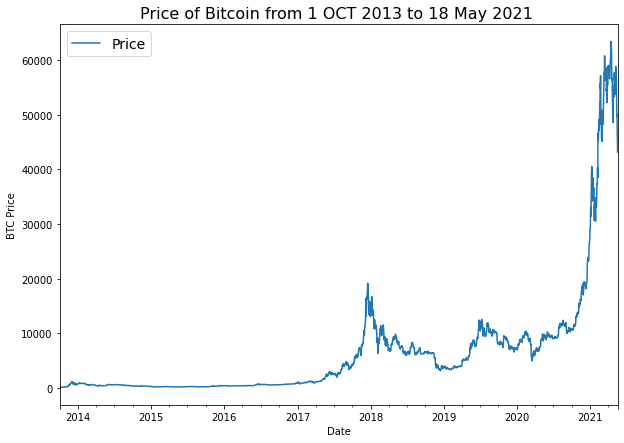

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 OCT 2013 to 18 May 2021 ",fontsize=16)
plt.legend(fontsize=14);

#### Importing time series data with Python's CSV module

In [9]:
#Importing and formating historical Bitcoin data with python
import csv
from datetime import datetime

timesteps=[]
btc_price=[]
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
    csv_reader=csv.reader(f,delimiter=",")
    next(csv_reader)  #Skip first line (this gets rid of the column titles)
    for line in csv_reader:
    
        timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))  #get the dates as dates (not strings)
        btc_price.append(float(line[2]))  #get the closing price as float
        
#view first 10 of each
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin from 1 OCT 2013 to 18 May 2021')

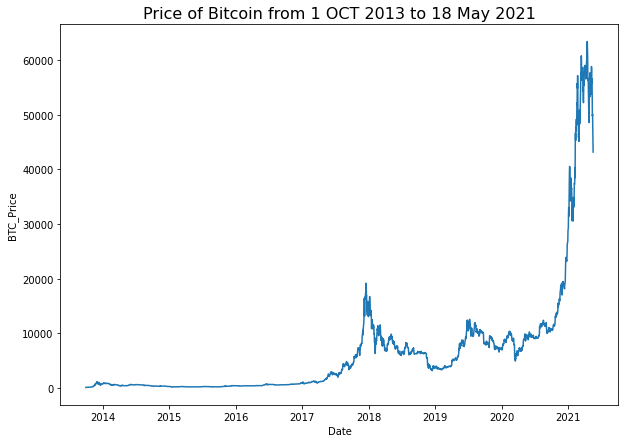

In [10]:
#plot fro CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.xlabel("Date")
plt.ylabel("BTC_Price")
plt.title("Price of Bitcoin from 1 OCT 2013 to 18 May 2021",fontsize=16)


#### Format data part1: Create train and Test sets of our time series data

#### Creating train and test sets with time series data (the wrong way)


In [11]:
#Get bitcoin date array
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
#wrong way to make train/test sets for Time series data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(timesteps,  #dates
                                              prices, #BTC prices
                                              test_size=0.2,
                                              random_state=42)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2229,), (2229,), (558,), (558,))

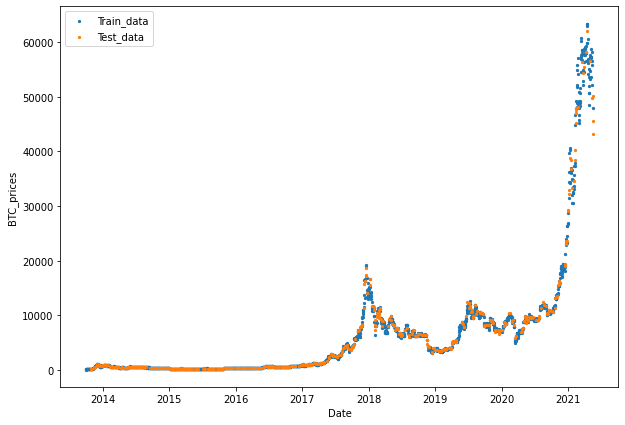

In [13]:
#Let's plot wrong train and test splits

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train_data")
plt.scatter(X_test,y_test,s=5,label="Test_data")
plt.xlabel("Date")
plt.ylabel("BTC_prices")
plt.legend()
plt.show();

#### Create train and test sets for time series (the right way)

In [14]:
#Create train and test splits the right way for time series data
split_size=int(0.8*len(prices))  # 80% train, 20% test-you can change these values


#Create train data splits(everything before the split)
X_train,y_train=timesteps[:split_size],prices[:split_size]


#Create test data splits (everything beyound the split)
X_test,y_test=timesteps[split_size:],prices[split_size:]


len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

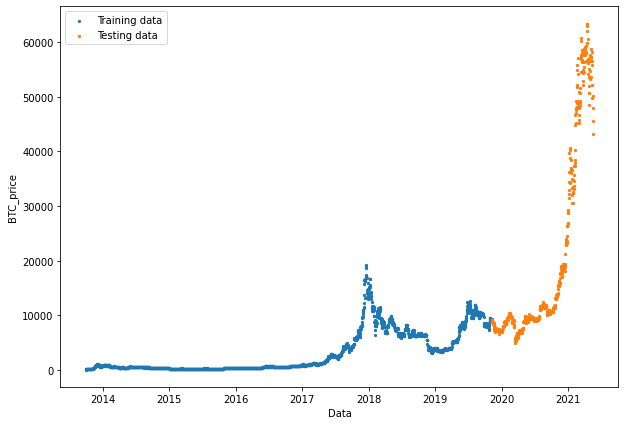

In [15]:
#Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Training data")
plt.scatter(X_test,y_test,s=5,label="Testing data")
plt.xlabel("Data")
plt.ylabel("BTC_price")
plt.legend();

#### Create a plotting function

Typing plotting code is tedious, let's functinalize it.

In [16]:
#Create a function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps)
    
    parameters
    ----------
    timesteps : array of timestep values
    values:  array of values across time
    format: style of plot,default "."
    start: where to start the plot (setting a value will index from start of timesteps and values)
    end: where to end the plot (similar to start but for the end)
    label: label to show on plot about values
    """
    #Plot the series
    plt.plot(timesteps[start:end], values[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)  # make label bigger
    plt.grid(True)

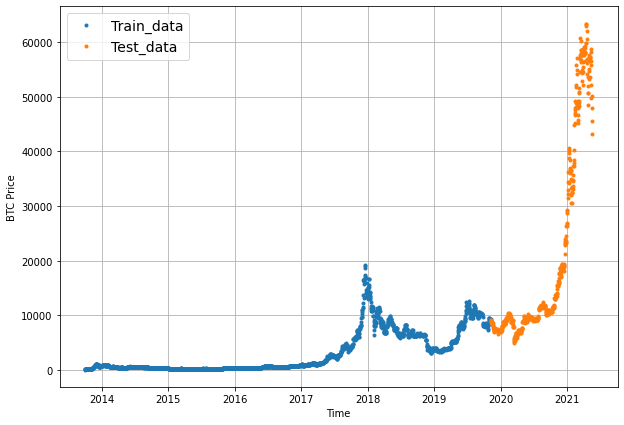

In [17]:
#Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train_data")
plot_time_series(timesteps=X_test,values=y_test,label="Test_data")

#### Modelling Experiments

we've got some Bitcoin historical data, to model it,let's run a series of modeling experiments and see which model performs best.


Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**

Modelling experiments we're running:

    0 Naive model (baseline)
    1 Dense model, horizon=1,window=7
    2 same as 1 (with some changes), horizon=1,window=30
    3 same as 1 (with some changes), horizon=7, window=30
    4 Conv1D
    5 LSTM
    6 same as 1 (but with multivariate data)
    7 N-Beats Algorithm
    8 Ensemble (multiple models optimized on different loss functions)
    9 Future prediction model (model to predict future values)
    10 Same as 1 (but with Turkey data introduced)


#### Model 0: Naive Forecast (base_line)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:
    The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) -this is for a horizon of 1


In [18]:
y_test[:10],y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

In [19]:
#Create a naive forcast

naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

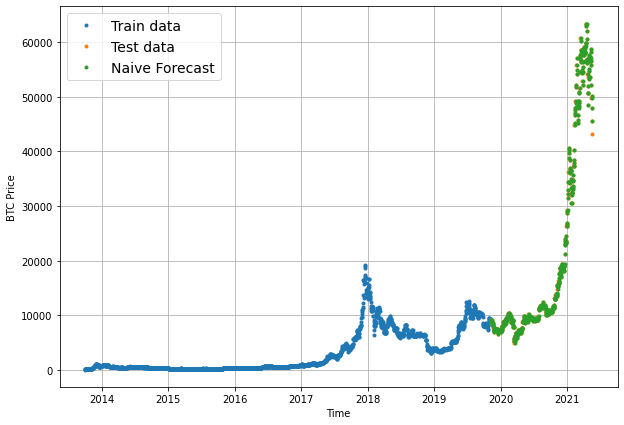

In [20]:
# plot naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,label="Naive Forecast")

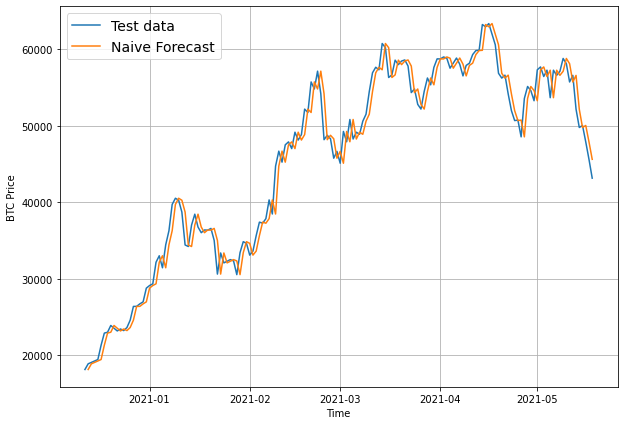

In [21]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test,values=y_test,start=400,format="-",label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,start=400,format="-",label="Naive Forecast")

**Exercise** Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autoregressive come up?

# Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

what are we doing?

we're predicting a number, so that means we have a form of regression problem.

Because we're working on a regression problem, we'll need some regression metrics.


Afew common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100

The  main thing we're evaluating here is: **how do our model's forecasts ( y_pred) compare against the actual values (y_true or ground truth values)?**

In [22]:
import tensorflow as tf

#MASE Implementation
def mean_absolute_scaled_error(y_true,y_pred):
    """
    
    Implement MASE (assuming no seasonality of data) in above example is market data.
    """
    
    mae=tf.reduce_mean(tf.abs(y_true-y_pred))
    
    #Find MAE of naive forecast (no seasonality)
    mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) #our seasonality is 1 day (hense the shift of 1)
    return mae/mae_naive_no_season

In [23]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.9995699939182624

For Tensorflow default data type is 32bit e.g. float32, for numpy it is 64bit e.g. float64

In [24]:
#Create a function to Take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true,y_pred):
    #Make sure float32 datatype (for metric calculations)
    y_true=tf.cast(y_true,dtype=tf.float32)
    y_pred=tf.cast(y_pred,dtype=tf.float32)
    
    #Calculate various evaluation metrics
    mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse=tf.sqrt(mse)
    mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase=mean_absolute_scaled_error(y_true,y_pred)
    
    result={"mae": mae.numpy(),
           "mse": mse.numpy(),
           "rmse":rmse.numpy(),
           "mape": mape.numpy(),
           "mase":mase.numpy()}
    
    return result
    

In [25]:
naive_results=evaluate_preds(y_true=y_test[1:],
                            y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [26]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [27]:
tf.reduce_min(y_test),tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

Other models you can use for baselines and for actual forecasts
I this notebook, we're focused on Tensorflow and deep learning methods.


However there are plenty of other styles of time series forecasting models you may want to experiment with:

## Format Data part 2: windowing our dataset


Why do we window?

we window our time series dataset to turn our data into a supervised learning problem.


```
windowing for one week
[0,1,2,3,4,5,6] -> [7]
[1,2,3,4,5,6,7] -> [8]
[2,3,4,5,6,7,8] -> [9]


In [28]:
len(y_train)

2229

In [29]:
#what we want to do with our Bitcoin data
print(f"we want to use:{btc_price[:7]} tp predict:{btc_price[7]}")

we want to use:[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] tp predict:123.033


In [30]:
#Let's setup global variables for window and horizon size
HORIZON=1     #predict next one day
WINDOW_SIZE=7      #use the past week of bitcoin data to make the prediction

In [31]:
#Create function to label windowed data
def get_labelled_windows(x,horizon=HORIZON):
    """
    Creates labels for windowd dataset.
    
    E.g. if horizon=1
    Input: [0,1,2,3,4,5,6,7]  -> Output: ([0,1,2,3,4,5,6],[7])
    
    """
    return x[:,:-horizon],x[:,-horizon:]

In [32]:
#Test out the window labelling fuctions
test_window,test_label=get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [33]:
print(f"Window:{tf.squeeze(test_window).numpy()}--> Label:{tf.squeeze(test_label).numpy()}")

Window:[1 2 3 4 5 6 7]--> Label:8


We've got a way to label our windowed data

However,this only works on a small scale.

we need a way to do the above across our entire time series

we could do this with python for loops, however,for large time series,that'd be quite slow


To speed things up, we'll leverage Numpy's array indexing.

our function will:
1. Create a window step of specific window size (e.g. [0,1,2,3,4,5,6])
2. Use Numpy indexing to create a 2D array of multiple window steps,for example:

```
[[0,1,2,3,4,5,6],
[1,2,3,4,5,6,7],
[2,3,4,5,6,7,8]]
```

3. uses the 2D array of Multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specific horizon


The function we're about to create has been adapted from the following article:

https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [34]:
import numpy as np
#Create fuction to view Numpy arrays as windows

def make_windows(x, window_size=WINDOW_SIZE,horizon=HORIZON):
    """
    Turns a 1D array into a 2D array of aequential labelled windows of window_size with horizon size labels.
    """
    # 1. Create a window of specific window_size (add the horizon on the end)
    window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
    
    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T  
    
    
    print(f"Window indexes:\n {window_indexes,window_indexes.shape}")
    
    
    # 3. Index on the target array (a Time series) with 2D array of multiple window steps
    windowed_array=x[window_indexes]
    #print(windowed_array)
    
    # 4. get the labelled windows
    windows,labels=get_labelled_windows(windowed_array,horizon=horizon)
    return windows,labels

In [35]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [36]:
len(prices)-1

2786

In [37]:
#View the first 3 wondows/labels
for i in range(3):
    print(f"Window:{full_windows[i]} ---> Label(horizon): {full_labels[i]}")

Window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] ---> Label(horizon): [123.033]
Window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] ---> Label(horizon): [124.049]
Window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] ---> Label(horizon): [125.96116]


In [38]:
#View the Last 3 windows/labels
for i in range(3):
    print(f"Window:{full_windows[i-3]}---> Label(horizon):{full_labels[i-3]}")

Window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]---> Label(horizon):[47885.62525472]
Window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]---> Label(horizon):[45604.61575361]
Window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]---> Label(horizon):[43144.47129086]


In [39]:
prices[-1]

43144.4712908603

In [40]:
prices[0]

123.65499

**Note:** You can find a function which achieves similar results to the ones we implemented above at `tf.keras.preprocessing.timeseries_dataset_from_array()` just like ours, it takes in an array and returns a windowed dataset. it has the benefit of returning data form of a `tf.data.Dataset`

#### Turning our windowed time series data into training and test sets

In [41]:
full_windows[:5],full_labels[:5]  #split into train and test set

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [42]:
# Make the Train/test splits
def make_train_test_splits(windows,labels,test_split=0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    
    split_size=int(len(windows)*(1-test_split)) #this will default to 80% train/20% test
    train_windows=windows[:split_size]
    train_labels=labels[:split_size]
    test_windows=windows[split_size:]
    test_labels=labels[split_size:]
    return train_windows,test_windows,train_labels,test_labels

In [43]:
# Create train and test windows
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

In [44]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [45]:
test_windows[:5],test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [46]:
#Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

#### Creating a modelling checkpoint callback to save our best performing model


Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances agains the other model's best performances.

For example if our model performs the best on epoch 55(but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.



In [47]:
import os

#Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name,save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                             verbose=0, #only output a limited amount of text
                                             save_best_only=True)
    

#### Model 1: Building,compiling and fitting a deep learning model on Bitcoin data

###### Model 1: Dense model (window=7,horizon=1)

our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32
* 100 epochs

why these values?

I picked them out of experimentation.

* **Hyperparameter** = values a machine learning practitioner (you!) can adjust themselves
* **Parameters** = values a model learns on it's own (patterns/weights)



In [48]:
import tensorflow as tf
from tensorflow.keras import layers


#set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")  #Linear activation is the same sa having no activation
],name="model_1_dense")  #name our model so we can save it


# 2. Compile the model
model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae","mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           verbose=1,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 4s 57ms/step - loss: 1491.1031 - mae: 1491.1031 - mse: 7651852.0000 - val_loss: 2480.8521 - val_mae: 2480.8521 - val_mse: 13109405.0000
Epoch 2/100
18/18 [==============================] - 0s 28ms/step - loss: 355.3727 - mae: 355.3727 - mse: 465270.8750 - val_loss: 1489.4576 - val_mae: 1489.4576 - val_mse: 5001999.0000
Epoch 3/100
18/18 [==============================] - 1s 34ms/step - loss: 165.1169 - mae: 165.1169 - mse: 131144.6719 - val_loss: 1026.2205 - val_mae: 1026.2205 - val_mse: 2756884.7500
Epoch 4/100
18/18 [==============================] - 1s 30ms/step - loss: 143.5280 - mae: 143.5280 - mse: 109388.8281 - val_loss: 732.4003 - val_mae: 732.4003 - val_mse: 1798477.6250
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 133.7584 - mae: 133.7584 - mse: 101212.6172 - val_loss: 733.8795 - val_mae: 733.8795 - val_mse: 1754143.8750
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 133

18/18 [==============================] - 0s 8ms/step - loss: 117.1366 - mae: 117.1366 - mse: 80474.8125 - val_loss: 616.4811 - val_mae: 616.4811 - val_mse: 1303906.2500
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 118.8426 - mae: 118.8426 - mse: 78454.4688 - val_loss: 660.8036 - val_mae: 660.8036 - val_mse: 1412743.0000
Epoch 32/100
18/18 [==============================] - 1s 35ms/step - loss: 116.5371 - mae: 116.5371 - mse: 81223.5000 - val_loss: 607.1675 - val_mae: 607.1675 - val_mse: 1291352.5000
Epoch 33/100
18/18 [==============================] - 0s 9ms/step - loss: 115.0796 - mae: 115.0796 - mse: 78009.1562 - val_loss: 614.6378 - val_mae: 614.6378 - val_mse: 1291971.8750
Epoch 34/100
18/18 [==============================] - 1s 32ms/step - loss: 115.7914 - mae: 115.7914 - mse: 79201.2109 - val_loss: 600.0867 - val_mae: 600.0867 - val_mse: 1268876.3750
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 112.1292 - mae: 112.1292 -

Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 106.4277 - mae: 106.4277 - mse: 70260.3516 - val_loss: 589.8961 - val_mae: 589.8961 - val_mse: 1204214.5000
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1073 - mae: 108.1073 - mse: 70440.1953 - val_loss: 678.7206 - val_mae: 678.7206 - val_mse: 1455050.8750
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9671 - mae: 110.9671 - mse: 68575.2188 - val_loss: 658.2073 - val_mae: 658.2073 - val_mse: 1387396.3750
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 122.2482 - mae: 122.2482 - mse: 78902.8516 - val_loss: 591.9986 - val_mae: 591.9986 - val_mse: 1223389.3750
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 131.0294 - mae: 131.0294 - mse: 86160.3203 - val_loss: 611.9845 - val_mae: 611.9845 - val_mse: 1271037.8750
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4065 - mae: 

**State of the art** represents the top performing method identified to date in the field. Concretly,this typically means that an algorithm,method,procedure,or theory yields the `best` results, as measured by the set of metrics agreed upon by the field, when compared against other methods

In [49]:
#Evaluate model on test data
model_1.evaluate(test_windows,test_labels)   #This is'nt the model's best performance, this is the last epoch performance

18/18 [==============================] - 0s 4ms/step - loss: 605.6080 - mae: 605.6080 - mse: 1221290.1250


[605.6079711914062, 605.6079711914062, 1221290.125]

In [50]:
#Load in saved best performing model_1 and evaluate it on Test data
model_1=tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 565.2325 - mae: 565.2325 - mse: 1153097.0000


[565.2324829101562, 565.2324829101562, 1153097.0]

Off the Target-- Not correct/accurate


mae=on average on the test dataset our model will make the prediction on average `566.2818` off the Target of the actual price of the bitcoin

In [51]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

#### create a function to make predictions with our trained models

#### Making forecast with a model (on the test dataset)

To make "forecasts" on the Test dataset (not: these won't be actual forecasts, they're only pseudo representation of future fore casts because actual forecasts are into the future).

Let's write a function to:
1. Take in a trained model
2. Takes in some input data(same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. returns the predictions

In [52]:
def make_preds(model,input_data):
    """
    Uses model to make predictions on input_data
    """
    forecast=model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [53]:
#Make predictions using model_1 on the test dataset and vies results

model_1_preds=make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8833.603, 8780.892, 9040.404, 8760.797, 8731.923, 8752.899,
        8647.547, 8531.143, 8455.311, 8522.299], dtype=float32)>)

In [54]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [55]:
#Evaluate preds
model_1_results=evaluate_preds(y_true=test_labels,
                              y_pred=model_1_preds)
model_1_results

{'mae': array([11940.111 , 11806.4795, 11986.353 , 11959.571 , 11965.668 ,
        12016.518 , 12107.051 , 12125.676 , 12085.424 , 12285.359 ,
        12339.301 , 12366.866 , 12670.883 , 12922.02  , 12890.457 ,
        13105.908 , 12961.592 , 13020.523 , 12732.369 , 12826.654 ,
        12592.38  , 12719.286 , 12832.552 , 12868.099 , 12881.551 ,
        12960.074 , 12820.545 , 12740.494 , 12726.338 , 12713.733 ,
        12868.349 , 12939.301 , 12972.875 , 12979.284 , 12939.994 ,
        13066.5625, 13044.576 , 13244.849 , 13522.097 , 12802.575 ,
        13015.029 , 13021.483 , 12903.411 , 12941.468 , 12999.346 ,
        12942.532 , 12960.822 , 12984.694 , 12949.165 , 12884.386 ,
        12830.042 , 12930.372 , 12987.808 , 12992.153 , 13181.296 ,
        12899.676 , 12864.97  , 12857.688 , 12602.631 , 12389.411 ,
        12371.475 , 12539.671 , 12358.874 , 12364.23  , 12320.109 ,
        12340.257 , 11973.456 , 11916.837 , 11986.297 , 11876.972 ,
        11870.108 , 12027.123 , 12018.925

In [56]:
test_labels.shape,model_1_preds.shape

((556, 1), TensorShape([556]))

In [57]:
tf.squeeze(test_labels).shape

TensorShape([556])

In [58]:
model_1_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_1_preds)
model_1_results

{'mae': 565.2325,
 'mse': 1153096.9,
 'rmse': 1073.8235,
 'mape': 2.5350597,
 'mase': 0.99295694}

In [59]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

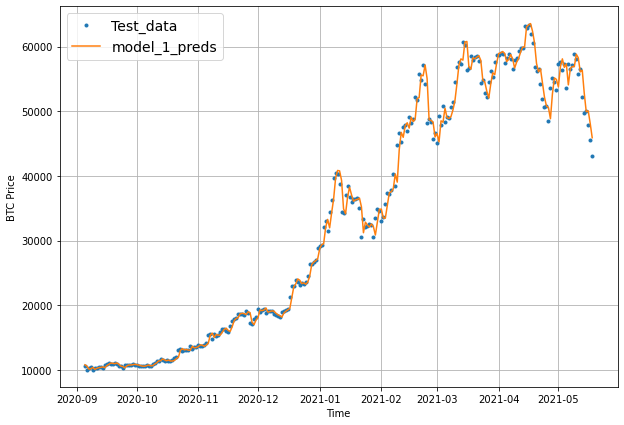

In [60]:
#Let's plot our model_1 predictions
offset=300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,start=offset,format="-",label="model_1_preds")

In [61]:
test_labels

array([[ 8798.04205463],
       [ 9081.18687849],
       [ 8711.53433917],
       [ 8760.89271814],
       [ 8749.52059102],
       [ 8656.97092235],
       [ 8500.64355816],
       [ 8469.2608989 ],
       [ 8537.33965197],
       [ 8205.80636599],
       [ 8118.4885358 ],
       [ 8074.84317361],
       [ 7612.7405735 ],
       [ 7262.11053495],
       [ 7303.40575852],
       [ 7041.73293642],
       [ 7211.86180875],
       [ 7141.06944869],
       [ 7523.4806726 ],
       [ 7390.20746923],
       [ 7729.26593894],
       [ 7542.23560864],
       [ 7381.96300782],
       [ 7333.43293049],
       [ 7315.36776456],
       [ 7213.73376172],
       [ 7398.78704961],
       [ 7511.88058312],
       [ 7532.12351309],
       [ 7550.23919987],
       [ 7333.09604316],
       [ 7239.76257544],
       [ 7198.06667705],
       [ 7190.27236926],
       [ 7238.87432299],
       [ 7087.02498535],
       [ 7112.73147612],
       [ 6883.49639377],
       [ 6584.02884335],
       [ 7424.01540023],


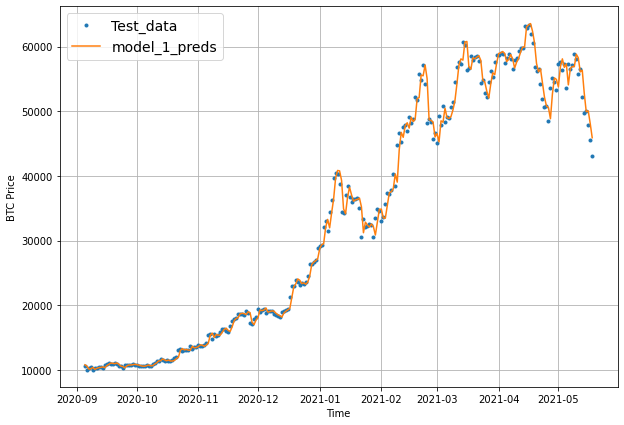

In [62]:
#Let's plot our model_1 predictions
offset=300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=tf.squeeze(test_labels),start=offset,label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,start=offset,format="-",label="model_1_preds")

In [63]:
#Check auto regressive data

##### Model 2: Building,fitting and evaluating a deep model with larger window size

In [64]:
## Model 2: Dense (window=30, horizon=1)
HORIZON=1  #predict one step at a time (one day of Bitcoin Prices)
WINDOW_SIZE=30  # #use 30 timesteps in past

In [65]:
#make window data with appropriate horizon and window sizes
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


(2757, 2757)

In [66]:
#Make Train and Testing windows
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(windows=full_windows,
                                                                          labels=full_labels,
                                                                          test_split=0.2)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2205, 2205, 552, 552)

In [67]:
train_windows[:3],train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [68]:
#Create the model_2

tf.random.set_seed(42)

# 1. Build the model
model_2=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_2_dense")


# 2. compile the model
model_2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])


# 3. Fit the model
model_2.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           batch_size=128,
            verbose=0,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [69]:
#Evaluate model_2 on test_data
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 692.1936 - mae: 692.1936 - mse: 1519145.7500


[692.193603515625, 692.193603515625, 1519145.75]

In [70]:
#Load in the Best performing model
model_2=tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 613.5080 - mae: 613.5080 - mse: 1285714.1250


[613.5079956054688, 613.5079956054688, 1285714.125]

In [71]:
#Get forecast predictions
model_2_preds=make_preds(model_2,input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [72]:
tf.squeeze(test_labels).shape,model_2_preds.shape

(TensorShape([552]), TensorShape([552]))

In [73]:
#Evaluate results for model_2 predictions
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_2_preds)
model_2_results

{'mae': 613.508,
 'mse': 1285714.1,
 'rmse': 1133.8933,
 'mape': 2.7605145,
 'mase': 1.072418}

In [74]:
model_1_results

{'mae': 565.2325,
 'mse': 1153096.9,
 'rmse': 1073.8235,
 'mape': 2.5350597,
 'mase': 0.99295694}

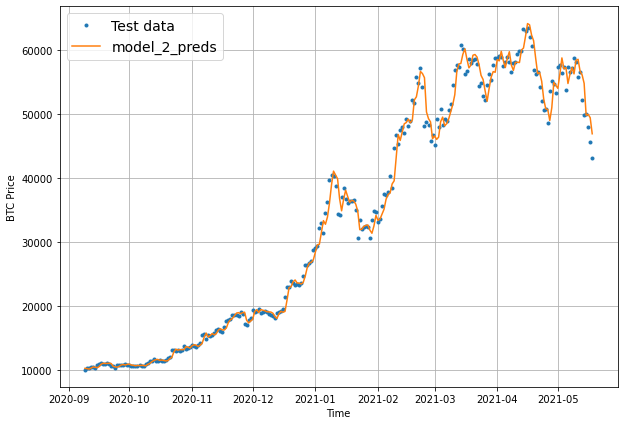

In [75]:
offset=300
plt.figure(figsize=(10,7))
#Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,start=offset,format="-",label="model_2_preds")


####  Model_3: Building,fitting and evaluating a model with larger horizon size

#### Model 3:Dense (window=30, horizon=7)

In [76]:
HORIZON=7
WINDOW_SIZE=30

full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

Window indexes:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


In [77]:
full_labels

array([[  196.02499   ,   198.04883   ,   198.93233   , ...,
          210.3075    ,   225.02      ,   248.25333   ],
       [  198.04883   ,   198.93233   ,   200.543     , ...,
          225.02      ,   248.25333   ,   262.32666   ],
       [  198.93233   ,   200.543     ,   210.3075    , ...,
          248.25333   ,   262.32666   ,   294.48699   ],
       ...,
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361],
       [56573.5554719 , 52147.82118698, 49764.1320816 , ...,
        47885.62525472, 45604.61575361, 43144.47129086]])

In [78]:
len(full_windows),len(full_labels)

(2751, 2751)

In [79]:
#split the Training and testing data
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(windows=full_windows,
                                                                          labels=full_labels,
                                                                          test_split=0.2)

In [80]:
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2200, 2200, 551, 551)

In [81]:
tf.random.set_seed(42)


# 1. Create the model
model_3=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_3_Dense")


# 2 Compile the model
model_3.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# 3. Fit the model
model_3.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           steps_per_epoch=128,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
128/128 [==============================] - 1s 9ms/step - loss: 552.0085 - mae: 552.0085 - val_loss: 1834.3324 - val_mae: 1834.3324
Epoch 2/100
128/128 [==============================] - 1s 7ms/step - loss: 311.3403 - mae: 311.3403 - val_loss: 1671.8438 - val_mae: 1671.8438
Epoch 3/100
128/128 [==============================] - 1s 5ms/step - loss: 297.0365 - mae: 297.0365 - val_loss: 1816.4198 - val_mae: 1816.4198
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 276.2661 - mae: 276.2661 - val_loss: 1748.2957 - val_mae: 1748.2957
Epoch 5/100
128/128 [==============================] - 1s 8ms/step - loss: 256.2232 - mae: 256.2232 - val_loss: 1459.4094 - val_mae: 1459.4094
Epoch 6/100
128/128 [==============================] - 1s 5ms/step - loss: 275.6243 - mae: 275.6243 - val_loss: 1498.6830 - val_mae: 1498.6830
Epoch 7/100
128/128 [==============================] - 1s 5ms/step - loss: 281.3858 - mae: 281.3858 - val_loss: 1500.6526 - val_mae: 1500.6526

128/128 [==============================] - 1s 4ms/step - loss: 243.3187 - mae: 243.3187 - val_loss: 1509.3353 - val_mae: 1509.3353
Epoch 49/100
128/128 [==============================] - 1s 5ms/step - loss: 239.4675 - mae: 239.4675 - val_loss: 1497.6309 - val_mae: 1497.6309
Epoch 50/100
128/128 [==============================] - 1s 4ms/step - loss: 229.3916 - mae: 229.3916 - val_loss: 1575.7671 - val_mae: 1575.7672
Epoch 51/100
128/128 [==============================] - 1s 4ms/step - loss: 249.5334 - mae: 249.5334 - val_loss: 1489.2635 - val_mae: 1489.2635
Epoch 52/100
128/128 [==============================] - 1s 4ms/step - loss: 228.6127 - mae: 228.6127 - val_loss: 1418.0386 - val_mae: 1418.0386
Epoch 53/100
128/128 [==============================] - 1s 5ms/step - loss: 232.3347 - mae: 232.3347 - val_loss: 1383.2487 - val_mae: 1383.2487
Epoch 54/100
128/128 [==============================] - 1s 5ms/step - loss: 233.5772 - mae: 233.5772 - val_loss: 1342.5243 - val_mae: 1342.5243
Epoch

In [82]:
#Evaluate the model on the Test data
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1224.4141 - mae: 1224.4141


[1224.4140625, 1224.4140625]

In [83]:
# Load best version of model_3 and evaluate
model_3=tf.keras.models.load_model("model_experiments/model_3_Dense/")

In [84]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1205.1565 - mae: 1205.1565


[1205.156494140625, 1205.156494140625]

In [85]:
#Make predictions with model_3
model_3_preds=make_preds(model_3,
                        input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [86]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9386.985 , 9538.528 , 9352.379 , 9559.299 , 9361.353 , 9432.367 ,
        9525.846 ],
       [8967.674 , 9037.596 , 8945.583 , 9108.248 , 8995.997 , 9049.557 ,
        9178.077 ],
       [8820.81  , 8823.237 , 8877.6045, 8985.147 , 8929.471 , 8932.113 ,
        9046.994 ],
       [9014.912 , 9071.276 , 9026.903 , 9176.15  , 9116.379 , 9261.446 ,
        9252.3955],
       [8851.994 , 9026.372 , 8835.329 , 9005.128 , 8991.683 , 9054.448 ,
        8978.492 ]], dtype=float32)>

In [87]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8837.95 , 8965.196, 8676.446, 8509.381, 8540.243], dtype=float32)>

In [88]:
#Evaluate model_3 results
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_3_preds)
model_3_results

{'mae': array([ 657.7503  ,  301.58902 ,  286.58887 ,  504.75726 ,  409.00168 ,
         483.25287 ,  503.50894 ,  540.175   ,  486.69608 ,  555.9425  ,
         808.3981  ,  810.5929  ,  899.1407  ,  953.6673  ,  660.7837  ,
         288.2267  ,  192.56145 ,  239.53328 ,  146.83315 ,  187.74498 ,
         229.53627 ,  270.68756 ,  494.19342 ,  434.96402 ,  218.51472 ,
         147.0242  ,  156.387   ,  148.11768 ,  137.52588 ,  212.05984 ,
         290.43707 ,  371.4836  ,  310.18387 ,  310.50955 ,  232.43164 ,
         275.58273 ,  348.88177 ,  219.25594 ,  236.17223 ,  229.88303 ,
         480.36615 ,   56.633648,   74.66511 ,   53.205845,  104.81627 ,
         103.343124,   98.56599 ,  136.97816 ,   85.688614,   77.93429 ,
         119.65967 ,  116.9737  ,  167.06502 ,  206.3323  ,  254.30273 ,
         365.33643 ,  558.57166 ,  477.5212  ,  491.38992 ,  556.0654  ,
         339.24136 ,  204.8425  ,  246.3787  ,  438.41016 ,  384.58334 ,
         516.5355  ,  483.0574  ,  482.91147

In [89]:
model_2_results

{'mae': 613.508,
 'mse': 1285714.1,
 'rmse': 1133.8933,
 'mape': 2.7605145,
 'mase': 1.072418}

In [90]:
model_3_preds.shape,model_2_preds.shape,model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

#### Adjusting the evaluation function to work for predictions with larger horizons

In [91]:
#Create a function to Take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true,y_pred):
    #Make sure float32 datatype (for metric calculations)
    y_true=tf.cast(y_true,dtype=tf.float32)
    y_pred=tf.cast(y_pred,dtype=tf.float32)
    
    #Calculate various evaluation metrics
    mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse=tf.sqrt(mse)
    mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase=mean_absolute_scaled_error(y_true,y_pred)
    
    #Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
    if mae.ndim >0:
        mae=tf.reduce_mean(mae)
        mse=tf.reduce_mean(mse)
        rmse=tf.reduce_mean(rmse)
        mape=tf.reduce_mean(mape)
        mase=tf.reduce_mean(mase)
    
    result={"mae": mae.numpy(),
           "mse": mse.numpy(),
           "rmse":rmse.numpy(),
           "mape": mape.numpy(),
           "mase":mase.numpy()}
    
    return result
    

In [92]:
# Get model_3 results aggregated to single value
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_3_preds)

In [93]:
model_3_results

{'mae': 1205.1564,
 'mse': 5125522.5,
 'rmse': 1389.1555,
 'mape': 5.4317646,
 'mase': 2.1445086}

#### Model_3: Visualizing the Results

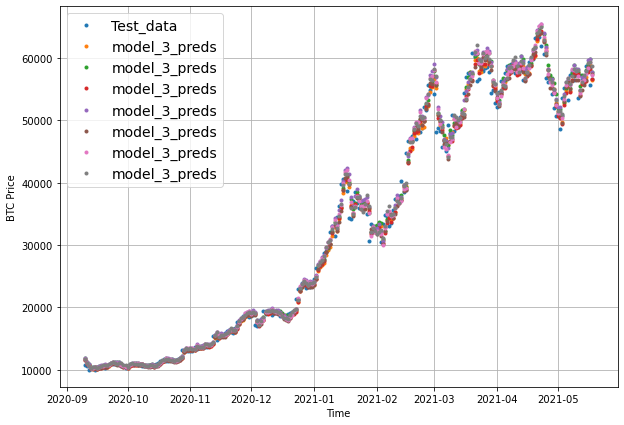

In [94]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_3_preds,start=offset,label="model_3_preds")

In [95]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9386.985 , 9538.528 , 9352.379 , 9559.299 , 9361.353 , 9432.367 ,
        9525.846 ],
       [8967.674 , 9037.596 , 8945.583 , 9108.248 , 8995.997 , 9049.557 ,
        9178.077 ],
       [8820.81  , 8823.237 , 8877.6045, 8985.147 , 8929.471 , 8932.113 ,
        9046.994 ],
       [9014.912 , 9071.276 , 9026.903 , 9176.15  , 9116.379 , 9261.446 ,
        9252.3955],
       [8851.994 , 9026.372 , 8835.329 , 9005.128 , 8991.683 , 9054.448 ,
        8978.492 ]], dtype=float32)>

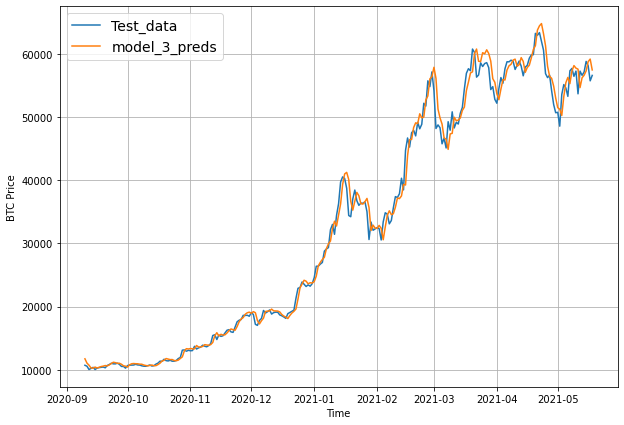

In [96]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,format="-",label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis=1),format='-',start=offset,label="model_3_preds")

#### which of our models is performing the best so for?

s0 we've trained a few models,now let's compare them and see how they've gone...

<Axes: >

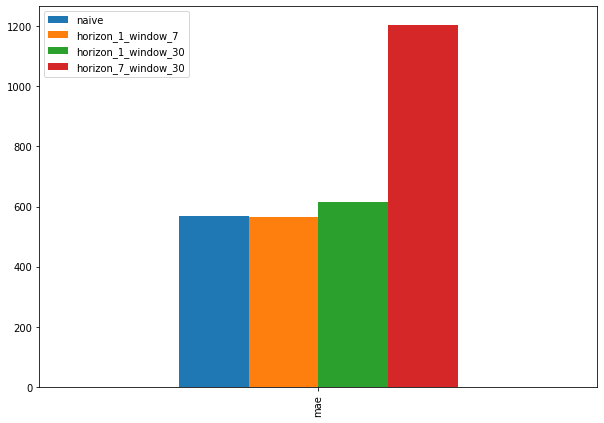

In [97]:
import pandas as pd
pd.DataFrame({"naive":naive_results["mae"],
            "horizon_1_window_7":model_1_results["mae"],
            "horizon_1_window_30":model_2_results["mae"],
            "horizon_7_window_30":model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")

<Axes: >

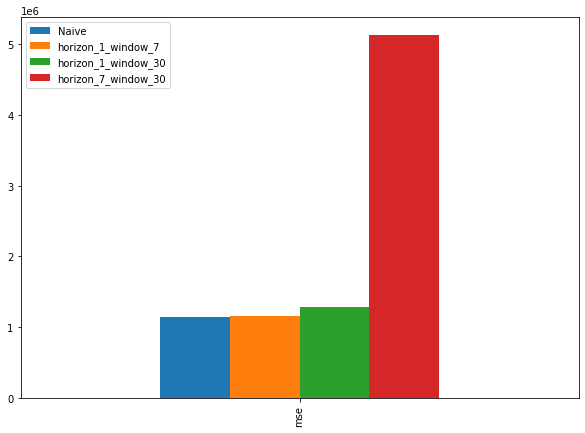

In [98]:
import pandas as pd
pd.DataFrame({"Naive":naive_results["mse"],
             "horizon_1_window_7":model_1_results["mse"],
             "horizon_1_window_30":model_2_results["mse"],
             "horizon_7_window_30":model_3_results["mse"]},index=["mse"]).plot(figsize=(10,7),kind="bar")

Naive method performs well due to may be autocorrelations present in the data

our Naaive model is performing best(it's very hard to beat a naive model in opensystems) but the dense model with a horizon of 1 and a window size of 7 looks to be performing closet


Because of this,let's use HORIZON=1 and WINDOW_SIZE=7 for our next series of modelling experiments (In other words. we'll use the previous week of BitCoin prices to try and predict the next day)

**Note:** You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. if a time series has autocorrelation it means the value at `t+1`(the next time step) is typically close to the value at 1 (the current timestep). In other words, today's value is probably pretty close to yesterday's value of course this is'nt always the case but when it is, a naive model will often get fairly good results


**Resource:** For more on how autocorrelation influences a model's predictions, see the article

https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

#### preparing the data to build Conv1D model

In [99]:
#### Model 4 Conv1D with horizon=1,window=7



In [100]:
HORIZON=1  #predict next day of bitcoin prices
WINDOW_SIZE=7  # use previous week worth  dat


In [101]:
#Create windowed data
full_windows,full_labels=make_windows(prices,window_size=7,horizon=1)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


In [102]:
#Split the windows and labels into train and test sets
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(windows=full_windows,
                                                                      labels=full_labels,
                                                                          test_split=0.2)

In [103]:
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

**1D Convolution layer(e.g. temporal convolution)**   temporal means related to time

To use the Conv1D layer, we need an input shape of: (batch_size,timesteps,input_dim)...
    
    
However our data is'nt in that shape yet....

Difference between `Conv1D` vs. `Conv2D`

Conv1D is used for sequences and Conv2D is used for images

* In Conv1D,kernel moves in one direction,input and output data of 1D CNN is 2 Dimensional, Mostly used on Time series data
* In Conv2D, kernel moves in two direction,input and output data of 2D CNN is 3 Dimensional, Mostly used on Image Data
* In Conv3D, kernel moves in 3 direction, input and output data of 3D CNN is 4 dimensional. Mostly used on 3D Image Data (MRI,CT scans)



In [104]:
#Check data input shape
train_windows[0].shape   #returns (WINDOW_SIZE,)

(7,)

In [105]:
# Before we pass our datasets to the Conv1D layer, we have to reshape it in order to make sure it works
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [106]:
expand_dims_layer=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))  # add an extra dimension for `input_dim`

In [107]:
#Test out our lambda layer
print(f"Original shape: {x.shape}")   #(WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}")  ##(WINDOW_SIZE,1)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [108]:
tf.random.set_seed(42)

#Create Conv1D model
model_4=tf.keras.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128,kernel_size=5,strides=1,padding="causal",activation="relu"),
    layers.Dense(HORIZON)
],name="model_4_conv1D")


# Compile the model
model_4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

#Fit the model
model_4.fit(train_windows,
           train_labels,
           batch_size=32,
           epochs=100,
           verbose=0,
           validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)]
           )

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


In [109]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [110]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [111]:
#Evaluate model
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 676.7055


676.7055053710938

In [112]:
#Load back in best performing Con1D and re-evaluat
model_4=tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.3811


566.381103515625

In [113]:
#Make Predictions
model_4_preds=make_preds(model_4,test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8856.38 , 8788.178, 9035.579, 8784.901, 8746.73 , 8743.713,
       8681.304, 8527.32 , 8470.426, 8528.708], dtype=float32)>

In [114]:
#Evaluate the predictions
model_4_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_4_preds)
model_4_results

{'mae': 566.38116,
 'mse': 1163259.5,
 'rmse': 1078.545,
 'mape': 2.5298564,
 'mase': 0.99497485}

In [115]:
model_1_results

{'mae': 565.2325,
 'mse': 1153096.9,
 'rmse': 1073.8235,
 'mape': 2.5350597,
 'mase': 0.99295694}

#### Model 5: Building,fitting and evaluating a LSTM(RNN) model on our Bitcoin data

#### Model 5: RNN(LSTM)

Let's build a RNN model for our Time series data.

We'll use the same data we created previously..


In [116]:
tf.random.set_seed(42)


#Let's build an LSTM model with Functional API
inputs=layers.Input(shape=(WINDOW_SIZE))
x=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)
#x=layers.LSTM(128,return_sequences=True)(x)
x=layers.LSTM(128,activation="relu")(x)
#x=layers.Dense(32,activation="relu")(x)

output=layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs=inputs,outputs=output,name="model_5_LSTM")


#Compile the model
model_5.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())


#Fit the model
model_5.fit(train_windows,
           train_labels,
           epochs=100,
            verbose=1,
            batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 2406.6855INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 103ms/step - loss: 2383.8484 - val_loss: 8838.7871
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 860.6588 INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 83ms/step - loss: 733.6405 - val_loss: 1102.8634
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 246.6887 - val_loss: 1293.1744
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 200.0276INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 80ms/step - loss: 194.9324 - val_loss: 1024.7216
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 184.6950INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 84ms/step - loss: 178.5714 - val_loss: 1024.1862
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 172.3541INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 80ms/step - loss: 174.2863 - val_loss: 992.9649
Epoch 7/100
18/18 [==============================] - 0s 13ms/step - loss: 178.3978 - val_loss: 997.8876
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 176.1123 - val_loss: 1008.9077
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 174.1788 - val_loss: 1002.2998
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 173.0993INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 93ms/step - loss: 173.0993 - val_loss: 980.0057
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 172.3936INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 82ms/step - loss: 172.3936 - val_loss: 975.0181
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 171.2094INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 83ms/step - loss: 171.2094 - val_loss: 964.5382
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 168.4428INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 87ms/step - loss: 169.0930 - val_loss: 962.8534
Epoch 14/100
18/18 [==============================] - 0s 11ms/step - loss: 167.4632 - val_loss: 971.2611
Epoch 15/100
15/18 [========================>.....] - ETA: 0s - loss: 170.0431INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 94ms/step - loss: 166.7909 - val_loss: 948.8322
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 166.6037INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 93ms/step - loss: 164.9354 - val_loss: 919.0951
Epoch 17/100
18/18 [==============================] - 0s 12ms/step - loss: 163.5826 - val_loss: 991.9458
Epoch 18/100
18/18 [==============================] - 0s 11ms/step - loss: 163.1582 - val_loss: 973.8129
Epoch 19/100
18/18 [==============================] - 0s 11ms/step - loss: 160.6790 - val_loss: 954.7081
Epoch 20/100
13/18 [====================>.........] - ETA: 0s - loss: 164.0573INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 82ms/step - loss: 159.7435 - val_loss: 888.8596
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 156.1259INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 97ms/step - loss: 157.3036 - val_loss: 888.1482
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 158.0845INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 82ms/step - loss: 155.5599 - val_loss: 881.1252
Epoch 23/100
18/18 [==============================] - 0s 13ms/step - loss: 154.9155 - val_loss: 896.8747
Epoch 24/100
18/18 [==============================] - 0s 12ms/step - loss: 152.0383 - val_loss: 967.9222
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 153.6105INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 83ms/step - loss: 153.6105 - val_loss: 852.2573
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 149.7027INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 96ms/step - loss: 149.7027 - val_loss: 849.7360
Epoch 27/100
18/18 [==============================] - 0s 16ms/step - loss: 148.5826 - val_loss: 856.1242
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 147.2165INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 147.2165 - val_loss: 819.5366
Epoch 29/100
18/18 [==============================] - 0s 13ms/step - loss: 146.6974 - val_loss: 843.5243
Epoch 30/100
18/18 [==============================] - 0s 16ms/step - loss: 146.0559 - val_loss: 834.5995
Epoch 31/100
16/18 [=========================>....] - ETA: 0s - loss: 143.0590INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 143.0440 - val_loss: 802.9272
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 138.1494INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 97ms/step - loss: 140.9429 - val_loss: 800.9847
Epoch 33/100
18/18 [==============================] - 0s 13ms/step - loss: 139.8906 - val_loss: 812.6312
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 144.9063INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 84ms/step - loss: 139.4797 - val_loss: 775.5729
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 137.3925INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 99ms/step - loss: 137.3925 - val_loss: 771.8599
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 137.1232INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 87ms/step - loss: 137.1232 - val_loss: 754.8779
Epoch 37/100
18/18 [==============================] - 0s 18ms/step - loss: 135.3019 - val_loss: 774.7623
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 133.7174INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 87ms/step - loss: 133.7136 - val_loss: 740.3292
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 133.5933INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 85ms/step - loss: 133.5933 - val_loss: 735.6441
Epoch 40/100
18/18 [==============================] - 0s 13ms/step - loss: 134.9115 - val_loss: 760.5359
Epoch 41/100
13/18 [====================>.........] - ETA: 0s - loss: 138.2913INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 132.0892 - val_loss: 720.3431
Epoch 42/100
18/18 [==============================] - 0s 12ms/step - loss: 129.5317 - val_loss: 724.0875
Epoch 43/100
13/18 [====================>.........] - ETA: 0s - loss: 124.6307INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 79ms/step - loss: 128.7190 - val_loss: 713.5912
Epoch 44/100
13/18 [====================>.........] - ETA: 0s - loss: 124.7705INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 76ms/step - loss: 127.7430 - val_loss: 706.7768
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 122.6398INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 81ms/step - loss: 126.2547 - val_loss: 696.6198
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 126.4254INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 95ms/step - loss: 126.7345 - val_loss: 694.4734
Epoch 47/100
18/18 [==============================] - 0s 12ms/step - loss: 124.6665 - val_loss: 729.1588
Epoch 48/100
18/18 [==============================] - ETA: 0s - loss: 124.2128INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 83ms/step - loss: 124.2128 - val_loss: 686.6342
Epoch 49/100
13/18 [====================>.........] - ETA: 0s - loss: 125.1355INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 79ms/step - loss: 122.9921 - val_loss: 684.3072
Epoch 50/100
18/18 [==============================] - 0s 11ms/step - loss: 127.7716 - val_loss: 721.3276
Epoch 51/100
18/18 [==============================] - 0s 10ms/step - loss: 126.9270 - val_loss: 782.8693
Epoch 52/100
15/18 [========================>.....] - ETA: 0s - loss: 129.9134INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 77ms/step - loss: 125.2825 - val_loss: 669.9783
Epoch 53/100
17/18 [===========================>..] - ETA: 0s - loss: 122.1763INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 94ms/step - loss: 121.5557 - val_loss: 669.9347
Epoch 54/100
18/18 [==============================] - 0s 12ms/step - loss: 120.4090 - val_loss: 674.9611
Epoch 55/100
13/18 [====================>.........] - ETA: 0s - loss: 126.8407INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 77ms/step - loss: 120.2017 - val_loss: 659.5792
Epoch 56/100
14/18 [======================>.......] - ETA: 0s - loss: 122.0477INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 78ms/step - loss: 121.1234 - val_loss: 647.8319
Epoch 57/100
18/18 [==============================] - 0s 11ms/step - loss: 125.0243 - val_loss: 710.2432
Epoch 58/100
13/18 [====================>.........] - ETA: 0s - loss: 122.2677INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 80ms/step - loss: 120.9031 - val_loss: 642.5673
Epoch 59/100
18/18 [==============================] - 0s 11ms/step - loss: 118.5486 - val_loss: 645.9202
Epoch 60/100
14/18 [======================>.......] - ETA: 0s - loss: 120.1827INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 118.6905 - val_loss: 641.9266
Epoch 61/100
18/18 [==============================] - 0s 13ms/step - loss: 117.4211 - val_loss: 671.3765
Epoch 62/100
18/18 [==============================] - 0s 11ms/step - loss: 118.9326 - val_loss: 692.6066
Epoch 63/100
14/18 [======================>.......] - ETA: 0s - loss: 126.2148INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 80ms/step - loss: 122.7259 - val_loss: 632.4174
Epoch 64/100
18/18 [==============================] - 0s 11ms/step - loss: 116.4511 - val_loss: 653.5795
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 116.3789INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 74ms/step - loss: 116.8879 - val_loss: 628.0411
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 115.1318 - val_loss: 632.2985
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 113.2826INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 78ms/step - loss: 116.0736 - val_loss: 620.9171
Epoch 68/100
18/18 [==============================] - 0s 21ms/step - loss: 116.5992 - val_loss: 621.4749
Epoch 69/100
18/18 [==============================] - 0s 18ms/step - loss: 120.4589 - val_loss: 631.3939
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 114.3006INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 115.7176 - val_loss: 616.4288
Epoch 71/100
18/18 [==============================] - 0s 15ms/step - loss: 114.6003 - val_loss: 645.4424
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 116.8694INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 85ms/step - loss: 116.9230 - val_loss: 612.3623
Epoch 73/100
18/18 [==============================] - 0s 12ms/step - loss: 113.4617 - val_loss: 614.1317
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 114.0760 - val_loss: 622.6635
Epoch 75/100
18/18 [==============================] - 0s 10ms/step - loss: 114.6066 - val_loss: 650.1852
Epoch 76/100
18/18 [==============================] - 0s 11ms/step - loss: 114.1478 - val_loss: 618.5680
Epoch 77/100
18/18 [==============================] - 0s 12ms/step - loss: 115.4906 - val_loss: 674.4104
Epoch 78/100
18/18 [==============================] - 0s 11ms/step - loss: 117.7898 - val_loss: 648.9470
Epoch 79/100
13/18 [====================>.........] - ETA: 0s - loss: 112.3591INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 78ms/step - loss: 114.5342 - val_loss: 602.5991
Epoch 80/100
18/18 [==============================] - 0s 12ms/step - loss: 112.2958 - val_loss: 618.1133
Epoch 81/100
18/18 [==============================] - 0s 12ms/step - loss: 113.5530 - val_loss: 647.4910
Epoch 82/100
13/18 [====================>.........] - ETA: 0s - loss: 118.6134INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 74ms/step - loss: 115.7355 - val_loss: 600.8527
Epoch 83/100
18/18 [==============================] - 0s 13ms/step - loss: 113.2911 - val_loss: 619.4877
Epoch 84/100
18/18 [==============================] - 0s 12ms/step - loss: 113.0861 - val_loss: 615.2524
Epoch 85/100
18/18 [==============================] - 0s 10ms/step - loss: 113.3613 - val_loss: 647.2239
Epoch 86/100
18/18 [==============================] - 0s 11ms/step - loss: 116.4422 - val_loss: 605.7672
Epoch 87/100
13/18 [====================>.........] - ETA: 0s - loss: 117.6935INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 113.0791 - val_loss: 596.4380
Epoch 88/100
18/18 [==============================] - 0s 17ms/step - loss: 111.0639 - val_loss: 598.0472
Epoch 89/100
18/18 [==============================] - 0s 17ms/step - loss: 111.2050 - val_loss: 636.2523
Epoch 90/100
18/18 [==============================] - 0s 16ms/step - loss: 118.7585 - val_loss: 619.4510
Epoch 91/100
18/18 [==============================] - 0s 10ms/step - loss: 114.4171 - val_loss: 612.6052
Epoch 92/100
16/18 [=========================>....] - ETA: 0s - loss: 111.2737INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 76ms/step - loss: 111.8999 - val_loss: 593.8432
Epoch 93/100
18/18 [==============================] - 0s 12ms/step - loss: 112.4357 - val_loss: 596.5228
Epoch 94/100
18/18 [==============================] - 0s 11ms/step - loss: 111.0064 - val_loss: 615.6552
Epoch 95/100
18/18 [==============================] - 0s 11ms/step - loss: 110.7341 - val_loss: 594.5967
Epoch 96/100
18/18 [==============================] - 0s 12ms/step - loss: 111.6761 - val_loss: 602.5922
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 111.6385 - val_loss: 633.4818
Epoch 98/100
14/18 [======================>.......] - ETA: 0s - loss: 113.8436INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 78ms/step - loss: 112.0291 - val_loss: 590.7964
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 110.2094INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 77ms/step - loss: 110.2094 - val_loss: 587.5683
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 112.5420 - val_loss: 588.9073


In [117]:
#Load in Best version of model_5 and evaluate on the test data
model_5=tf.keras.models.load_model("model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 587.5684


587.568359375

In [118]:
#Make predictions with our LSTM Model
model_5_preds=make_preds(model_5,test_windows)

18/18 [==============================] - 0s 1ms/step


In [119]:
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8941.284, 8805.224, 8969.322, 8785.903, 8748.794], dtype=float32)>

In [120]:
#Evaluate model_5 predictions
model_5_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_5_preds)
model_5_results

{'mae': 587.56836,
 'mse': 1234037.0,
 'rmse': 1110.8722,
 'mape': 2.6353288,
 'mase': 1.0321949}

In [121]:
model_1_results

{'mae': 565.2325,
 'mse': 1153096.9,
 'rmse': 1073.8235,
 'mape': 2.5350597,
 'mase': 0.99295694}

**Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results, you're probably starting to clue onto this now.

#### Investigating how to turn our univariate timeseries into multivariate

#### Making a Mulivariate time series dataset


Before we add a feature to our time series, what is a feature we can use?

one feature we could add is wheather or not Daniel Bourke tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's the better feature to use?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [122]:
#Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [123]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [124]:
#Let's add the bitcoin halving events to our dataset
block_reward_1=50 #3 January 2009 -this block reward isn't in our dataset ( our data it starts from 01 October 2013)
block_reward_2=25 # 8 November 2012
block_reward_3=12.5 # 9 July 2016
block_reward_4=6.25  # 18 May 2020



#block reward dates
block_reward_2_datetime=np.datetime64("2012-11-08")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")


In [125]:
#Create date ranges of where specific block_reward values should be

block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [126]:
#Add in a block_reward column
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2

In [127]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [128]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None
2021-05-17,45604.615754,None
2021-05-18,43144.471291,None


In [129]:
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3

In [130]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None
2021-05-17,45604.615754,None
2021-05-18,43144.471291,None


In [131]:
bitcoin_prices_block.iloc[1500:1550]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5
2017-11-14,6666.27125,12.5
2017-11-15,6867.42625,12.5
2017-11-16,7259.30000,12.5
2017-11-17,7924.18250,12.5


In [132]:
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [133]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

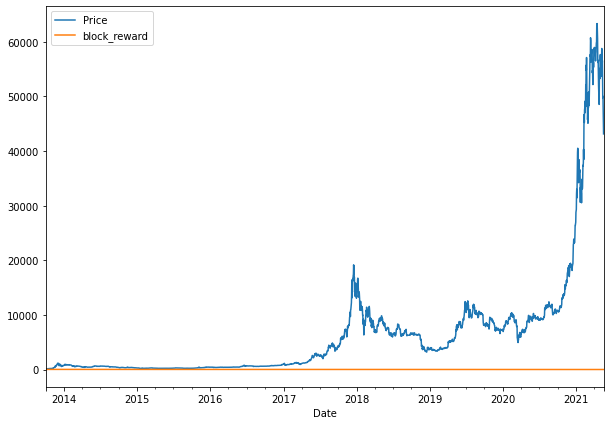

In [134]:
bitcoin_prices_block.plot(figsize=(10,7))

since it's not in same scale, we need to adjust the scale to plot

<Axes: xlabel='Date'>

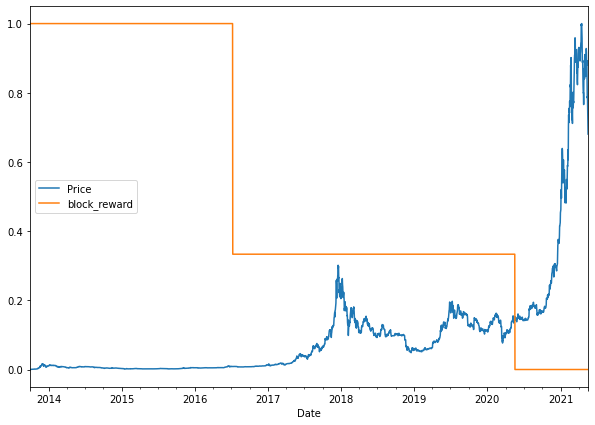

In [135]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                  columns=bitcoin_prices_block.columns,
                                  index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

In closed system you might get multiple features, in open systems need to consider one which impact the other

#### Preparing our multivariate time series for a model

#### Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.




In [136]:
# setup dataset hyperparameters
HORIZON=1
WINDOW_SIZE=7

In [137]:
# Make a copy of the Bitcoin historical data with block reward feature

bitcoin_prices_windowed=bitcoin_prices_block.copy()


#Add windowed columns
for i in range(WINDOW_SIZE):  #shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f"Price+{i+1}"]=bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


what we've done is created a way to window our dataset directly from a pandas dataframe

```
[0,1,2,3,4,5,6,block_reward]  --->  [7]
[1,2,3,4,5,6,7,block_reward]  --->   [8]
[2,3,4,5,6,7,8,block_reward]  ---> [9]
```

In [138]:
# Create X (windows) and y (horizons)  feautures
X=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [139]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [140]:
#Make train and test sets using indexing
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [141]:
X_train,y_train,X_test,y_test

(            block_reward      Price+1      Price+2      Price+3      Price+4  \
 Date                                                                           
 2013-10-08          25.0   121.794998   120.655327   121.338661   118.674660   
 2013-10-09          25.0   123.032997   121.794998   120.655327   121.338661   
 2013-10-10          25.0   124.049004   123.032997   121.794998   120.655327   
 2013-10-11          25.0   125.961159   124.049004   123.032997   121.794998   
 2013-10-12          25.0   125.279663   125.961159   124.049004   123.032997   
 ...                  ...          ...          ...          ...          ...   
 2019-11-05          12.5  9202.415039  9290.896484  9197.632812  9131.410156   
 2019-11-06          12.5  9369.627930  9202.415039  9290.896484  9197.632812   
 2019-11-07          12.5  9326.599609  9369.627930  9202.415039  9290.896484   
 2019-11-08          12.5  9335.751953  9326.599609  9369.627930  9202.415039   
 2019-11-09          12.5  9

#### Model_6:Building,fitting and evaluating a multivariate time series model

#### Model_6:Dense(Multivariate time series)

In [142]:
tf.random.set_seed(42)

# Make Multivariate time series model
model_6=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    #layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_6_dense_multivariate")


# Compile the model
model_6.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,y_train,
           epochs=100,
           batch_size=128,
           verbose=1,
           validation_data=(X_test,y_test),
           callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1580.3922INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 25ms/step - loss: 1475.8076 - val_loss: 2699.3423
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 399.6684INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 19ms/step - loss: 384.0416 - val_loss: 1777.1394
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 244.9145INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 198.4897 - val_loss: 1218.3456
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 222.6584INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 167.4179 - val_loss: 908.7828
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 156.7262INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 158.2611 - val_loss: 884.0851
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9580INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 158.2976 - val_loss: 864.9153
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 185.8769INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 153.4455 - val_loss: 851.1474
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 122.1080INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 19ms/step - loss: 151.1960 - val_loss: 834.1041
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 150.3204 - val_loss: 841.1973
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 155.7525INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 146.7547 - val_loss: 805.7343
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 150.9895INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 142.9865 - val_loss: 804.2283
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 141.1577 - val_loss: 847.0682
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 123.9508INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 140.7258 - val_loss: 798.6955
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 136.7178 - val_loss: 814.7903
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 140.0222INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 136.5493 - val_loss: 760.8407
Epoch 16/100
18/18 [==============================] - 0s 3ms/step - loss: 132.9058 - val_loss: 763.5383
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 131.2649 - val_loss: 765.8105
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 142.8713INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 26ms/step - loss: 131.8785 - val_loss: 735.1308
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 127.7505 - val_loss: 765.5529
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 141.6441INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 126.1030 - val_loss: 687.9807
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 158.4933INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 126.9495 - val_loss: 679.9495
Epoch 22/100
18/18 [==============================] - 0s 3ms/step - loss: 123.9509 - val_loss: 681.5163
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 123.2316INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 124.2160 - val_loss: 679.3375
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 132.0097INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 120.2269 - val_loss: 676.4840
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 134.5421INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 17ms/step - loss: 119.4910 - val_loss: 649.9608
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 121.4789INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 121.8040 - val_loss: 641.0210
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 165.2436INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 119.8088 - val_loss: 634.5917
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 107.2193INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 116.1274 - val_loss: 632.9573
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 114.6256INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 17ms/step - loss: 115.5995 - val_loss: 631.3286
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1004INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 119.6589 - val_loss: 628.2347
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 122.7390INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 114.8236 - val_loss: 621.3253
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 109.3737INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 114.0270 - val_loss: 613.6131
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 113.7847 - val_loss: 657.6665
Epoch 34/100
18/18 [==============================] - 0s 3ms/step - loss: 113.3850 - val_loss: 625.1114
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 111.3300INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 17ms/step - loss: 112.2447 - val_loss: 594.6802
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 155.5711INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 116.0545 - val_loss: 592.2572
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5441 - val_loss: 602.6744
Epoch 38/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6282 - val_loss: 602.3088
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 126.9744INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 110.8679 - val_loss: 585.1509
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2238 - val_loss: 597.3799
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5486 - val_loss: 600.5501
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5094 - val_loss: 623.1333
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8443 - val_loss: 605.7085
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 109.8560 - val_loss: 587.6736
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 85.6560INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 108.6222 - val_loss: 583.6426
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 109.9100 - val_loss: 604.2401
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7860 - val_loss: 592.0275
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 109.4301 - val_loss: 614.8204
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 164.6902INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 114.3583 - val_loss: 570.5724
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6336 - val_loss: 690.2755
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 115.3579 - val_loss: 592.8682
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 112.8267 - val_loss: 585.7863
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 112.0303 - val_loss: 651.8094
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 115.3233 - val_loss: 586.3340
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 128.1041INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 18ms/step - loss: 112.1668 - val_loss: 567.7711
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7392 - val_loss: 757.0678
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 122.1823 - val_loss: 643.3616
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 117.7624 - val_loss: 599.8693
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6982 - val_loss: 623.3839
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2513 - val_loss: 611.5662
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6799 - val_loss: 573.1548
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7980 - val_loss: 568.9584
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 108.0935 - val_loss: 578.6693
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 27ms/step - loss: 106.7887 - val_loss: 564.1119
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 105.7584 - val_loss: 634.7819
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 115.6518 - val_loss: 758.2350
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 124.8079 - val_loss: 579.2601
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 132.4219 - val_loss: 606.8812
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 111.9055 - val_loss: 601.4205
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 107.7922 - val_loss: 576.4409
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 111.5383 - val_loss: 605.3563
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 106.6164 - val_loss: 574.7960
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 17ms/step - loss: 114.9446 - val_loss: 563.4803
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6654 - val_loss: 663.0948
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 112.0646 - val_loss: 567.6168
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 106.7280 - val_loss: 572.8517
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 107.5221 - val_loss: 568.9017
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 105.3060 - val_loss: 581.5560
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 107.6316 - val_loss: 569.4235
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 109.9604 - val_loss: 582.6646
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 107.1458 - val_loss: 660.1433
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 0s 17ms/step - loss: 105.9854 - val_loss: 562.6280
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 109.9824 - val_loss: 646.2397
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5514 - val_loss: 595.4948
Epoch 98/100
18/18 [==============================] - 0s 3ms/step - loss: 107.6356 - val_loss: 567.4597
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5954 - val_loss: 565.8078
Epoch 100/100
18/18 [==============================] - 0s 3ms/step - loss: 107.4128 - val_loss: 588.8334


In [143]:
# Evaluate multivariate model
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 589.0865


589.0865478515625

In [144]:
#Load in and evaluate best performing model
model_6=tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 562.4987


562.4987182617188

In [145]:
# Make predictions with Multivariate model
model_6_preds= tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 852us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8841.266, 8801.131, 9053.775, 8767.105, 8760.963, 8750.772,
       8672.671, 8537.61 , 8470.914, 8537.176], dtype=float32)>

In [146]:
#Evaluate predictions to get eval metrics
model_6_results=evaluate_preds(y_true=y_test,
                              y_pred=model_6_preds)
model_6_results

{'mae': 562.4987,
 'mse': 1150430.6,
 'rmse': 1072.5813,
 'mape': 2.5007386,
 'mase': 0.9881545}

In [147]:
model_1_results

{'mae': 565.2325,
 'mse': 1153096.9,
 'rmse': 1073.8235,
 'mape': 2.5350597,
 'mase': 0.99295694}

In [148]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [149]:
#Exercise

tf.random.set_seed(42)

#Create the model
model_exe_1=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_exe_1")

#Compile the model
model_exe_1.compile(loss="mae",
                   optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_exe_1.fit(X_train,y_train,
               epochs=100,
               verbose=0,
               validation_data=(X_test,y_test),
               callbacks=[create_model_checkpoint(model_name=model_exe_1.name)])

INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_exe_1\assets


In [150]:
# Evaluate the model
model_exe_1.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 720.3129


720.3128662109375

In [151]:
#Load the best performing model
model_exe_1=tf.keras.models.load_model("model_experiments/model_exe_1/")
model_exe_1.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 570.7901


570.7901000976562

In [152]:
#Predict on test data
model_exe_1_preds=tf.squeeze(model_exe_1.predict(X_test))
model_exe_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8796.455, 8741.841, 9013.917, 8736.723, 8690.171, 8695.661,
       8654.827, 8491.22 , 8412.511, 8504.809], dtype=float32)>

In [153]:
# Evaluate the prediction
model_exe_1_results=evaluate_preds(y_true=y_test,
                                  y_pred=model_exe_1_preds)
model_exe_1_results

{'mae': 570.7901,
 'mse': 1167217.2,
 'rmse': 1080.3783,
 'mape': 2.5691905,
 'mase': 1.0027201}

In [154]:
model_1_results

{'mae': 565.2325,
 'mse': 1153096.9,
 'rmse': 1073.8235,
 'mape': 2.5350597,
 'mase': 0.99295694}

#### Model_7: N-BEATS Algorithm

**N-Beats:** Neural basis expansion analysis for interpretable time series forecasting

We are going to replicating a paper

why?
* This will allow us to practice replicating a paper with Tensorflow code
* We will see how to use Tensorflow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

As a Machine Learning Engineer
---------

1. Download a Paper
2. Implement it
3. Keep doing this until you have skills

---George Hotz


* Machine Learning Engineering also involves building infrastruture around your models/data preprocesing steps

#### Replicating the N-Beats basic block with tensorflow layer subclassing

#### Building and Testing N-Beats Block layer

Because the N-BEATS block layer doesn't exist in Tensorflow,we've got to create it.

To create custom layers and models in Tensorflow we can use subclassing:
https://www.tensorflow.org/guide/keras/custom_layers_and_models


In [155]:
#Create NBeatBlock custom layer

In [156]:
import tensorflow as tf
print(f"Tensorflow Version:{tf.__version__}")

Tensorflow Version:2.10.0


**This is the N-BEATS basic block replication with Tensorflow layer subclassing(section 3.1 of N-Beats paper)**

In [157]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                input_size: int,
                theta_size: int,
                horizon: int,
                n_neurons: int,
                n_layers: int,
                **kwargs):   #the **kwargs argument takes care of all the arguments for the parent class (e.g. input_shape,trainable,name..stc)
        super().__init__(**kwargs)
        self.input_size=input_size
        self.theta_size=theta_size
        self.horizon=horizon
        self.n_neurons=n_neurons
        self.n_layers=n_layers
        
        # Block contains stack of 4 fully connected layers each has ReLu activation
        self.hidden=[tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
        #Output of block is a theta layer with Linear activation
        self.theta_layer=tf.keras.layers.Dense(theta_size,activation="linear",name="theta")
        
    def call(self,inputs):
        x=inputs
        for layer in self.hidden:
            x=layer(x)
        theta=self.theta_layer(x)
        #output the backcast and the forecast from theta
        backcast,forecast=theta[:,:self.input_size],theta[:,-self.horizon:]
        return backcast,forecast
            

#### Testing our N-Beats bock implementation with dummy data inputs

In [158]:
# set up dummy NBeats Block layer to represent
dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW_SIZE,
                                    theta_size=WINDOW_SIZE+HORIZON, #backcat_forecast
                                    horizon=HORIZON,
                                    n_neurons=128,
                                    n_layers=4)

In [159]:
#Create dummy inputs (have to be same size as input_size)
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)  #input shape to the model has to reflect dense layer input requirements (ndim=2)

In [160]:
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [161]:
#Pass dummy inputs to dummy NBeatsBlock layer
backcast,forecast=dummy_nbeats_block_layer(dummy_inputs)
#These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast:{tf.squeeze(backcast.numpy())}")
print(f"Forecast:{tf.squeeze(forecast.numpy())}")

Backcast:[-0.9272193   0.20343491 -0.07471624  0.41121125  0.17073485  0.12282923
 -0.5782996 ]
Forecast:-0.9687861204147339


#### Preparing data for the N-Beats algorithm using tf.data

Tm make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide:
https://www.tensorflow.org/guide/data_performance#:~:text=Achieving%20peak%20performance%20requires%20an%20efficient%20input%20pipeline,API%20to%20build%20highly%20performant%20TensorFlow%20input%20pipelines.

In [189]:
HORIZON=1  # How far to predict forward
WINDOW_SIZE=7  # how far to lookback

In [190]:
# Create N-BEATS data inputs (N_BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [193]:
# Add windowed columns
bitcoin_prices_nbeats=bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"]=bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [194]:
# Make features and labels
X=bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y=bitcoin_prices_nbeats.dropna()["Price"]


# Make train and test sets
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [195]:
#Time to make our dataset performant using tf.data API
train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)


#Combine labels and features by zipping together -> (features,labels)
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

#Batch and prefetch
BATCH_SIZE=1024
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

#### Model 7: Setting up hyperparameters for the N-Beats algorithm

The N-Beats algorithm has a fair few number of parameters,many of them can be found in Table 18 of N-Beats paper:https://arxiv.org/abs/1905.10437

In [197]:
# Values from N-BEATS paper
N_EPOCHS =5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30

INPUT_SIZE=WINDOW_SIZE*HORIZON
THETA_SIZE=INPUT_SIZE+HORIZON


INPUT_SIZE,THETA_SIZE

(7, 8)

#### Getting ready for residual connections


Before we can craft our N-Beats model,we need two layers for the Residual connections (subtract and add)


The N-Beats algorithm uses double residual stacking to help train it's deeper architecture (section 3.2 of N-beats paper)

In [198]:
#Make Tensors

tensor_1=tf.range(10)+10
tensor_2=tf.range(10)


#subtract
subtracted=layers.subtract([tensor_1,tensor_2])

#add
added=layers.add([tensor_1,tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


#### Model 7:outlining the steps we're going to take to build the N-Beats model

1. Setup an instance of the N-Beats block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)

2. Create an input Layer for the N-Beats stack (we'll be using the keras Functional API)

3. Make the initial backcast and forecast for the model with layer created  in (1)

4. Use for loop to create stacks of block layers

5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts

6. Create the double residual stacking using subtract and add layers

7. Put the model inputs and outputs together using `tf.keras.Model()`

8. compile the model with MAE loss (the paper uses muliple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default stting as per section 5.2 of N-Beats paper
9. Fit the N-Beats model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
 * Early Stopping- because the model will be training for so long, we'll stpo it early if it stops improving
 * Reduce LR on Plateau - if a model stops improving,try lowering the learning to reduce the amount it updates it's weights each time (take smaller steps towards best performance).

#### Model_7: Putting together the pieces of the puzzle of the N-Beats model

In [199]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                              theta_size=THETA_SIZE,
                              horizon=HORIZON,
                              n_neurons=N_NEURONS,
                              n_layers=N_LAYERS,
                              name="InitialBlock")

# 2. Create input to stack
stack_input=layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. create initial backcast and forecast input (backwards prediction+ horizon prediction)
residuals,forecast=nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i,_ in enumerate(range(N_STACKS-1)):  #first stack is already created in (3)
    #5. Use the NbeatsBlock to calculate the backcast as well as the forecast
    backcast,block_forecast=NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}")(residuals)  #pass in the residuals
    
    # 6. Create the double residual stacking
    residuals=layers.subtract([residuals,backcast], name=f"subtract_{i}")
    forecast=layers.add([forecast,block_forecast],name=f"add_{i}")

# 7. put the stack model together
model_7=tf.keras.Model(inputs=stack_input,outputs=forecast,name="model_7_NBEATS")

# 8. Compile the model with MAE loss
model_7.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLRONPlateau callbacks
model_7.fit(train_dataset,
           epochs=N_EPOCHS,
            validation_data=test_dataset,
           verbose=0,
           callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                      patience=200,
                                                      restore_best_weights=True),
                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                         patience=100,
                                                         verbose=1)])
    


Epoch 774: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 991: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1091: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: total: 29.7 s
Wall time: 2min 52s


In [201]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 73ms/step - loss: 570.7510


570.7510375976562

In [203]:
# Make predictions with N-Beats model
model_7_preds=make_preds(model_7,test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 717ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8826.703 , 8778.3955, 9012.41  , 8765.874 , 8759.56  , 8713.949 ,
       8651.74  , 8509.342 , 8457.433 , 8504.527 ], dtype=float32)>

In [204]:
#Evaluate N-Beats model preds
model_7_results=evaluate_preds(y_true=y_test,
                              y_pred=model_7_preds)

In [207]:
model_7_results

{'mae': 570.75104,
 'mse': 1154245.5,
 'rmse': 1074.3582,
 'mape': 2.6101983,
 'mase': 1.0026515}

In [209]:
model_1_results

{'mae': 565.2325,
 'mse': 1153096.9,
 'rmse': 1073.8235,
 'mape': 2.5350597,
 'mase': 0.99295694}

In [210]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Even with all of those special layers and hand-crafted network,it looks like the N-Beats model doesn't perform as well as model_1 or the original naive forecast


This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certatin type of data.

#### Model_7:plotting the N-Beats algorithm we've created and admiring it's beauty

In [213]:
# Plot the N-Beats model and inspect the architecture
from tensorflow.keras.utils import plot_model

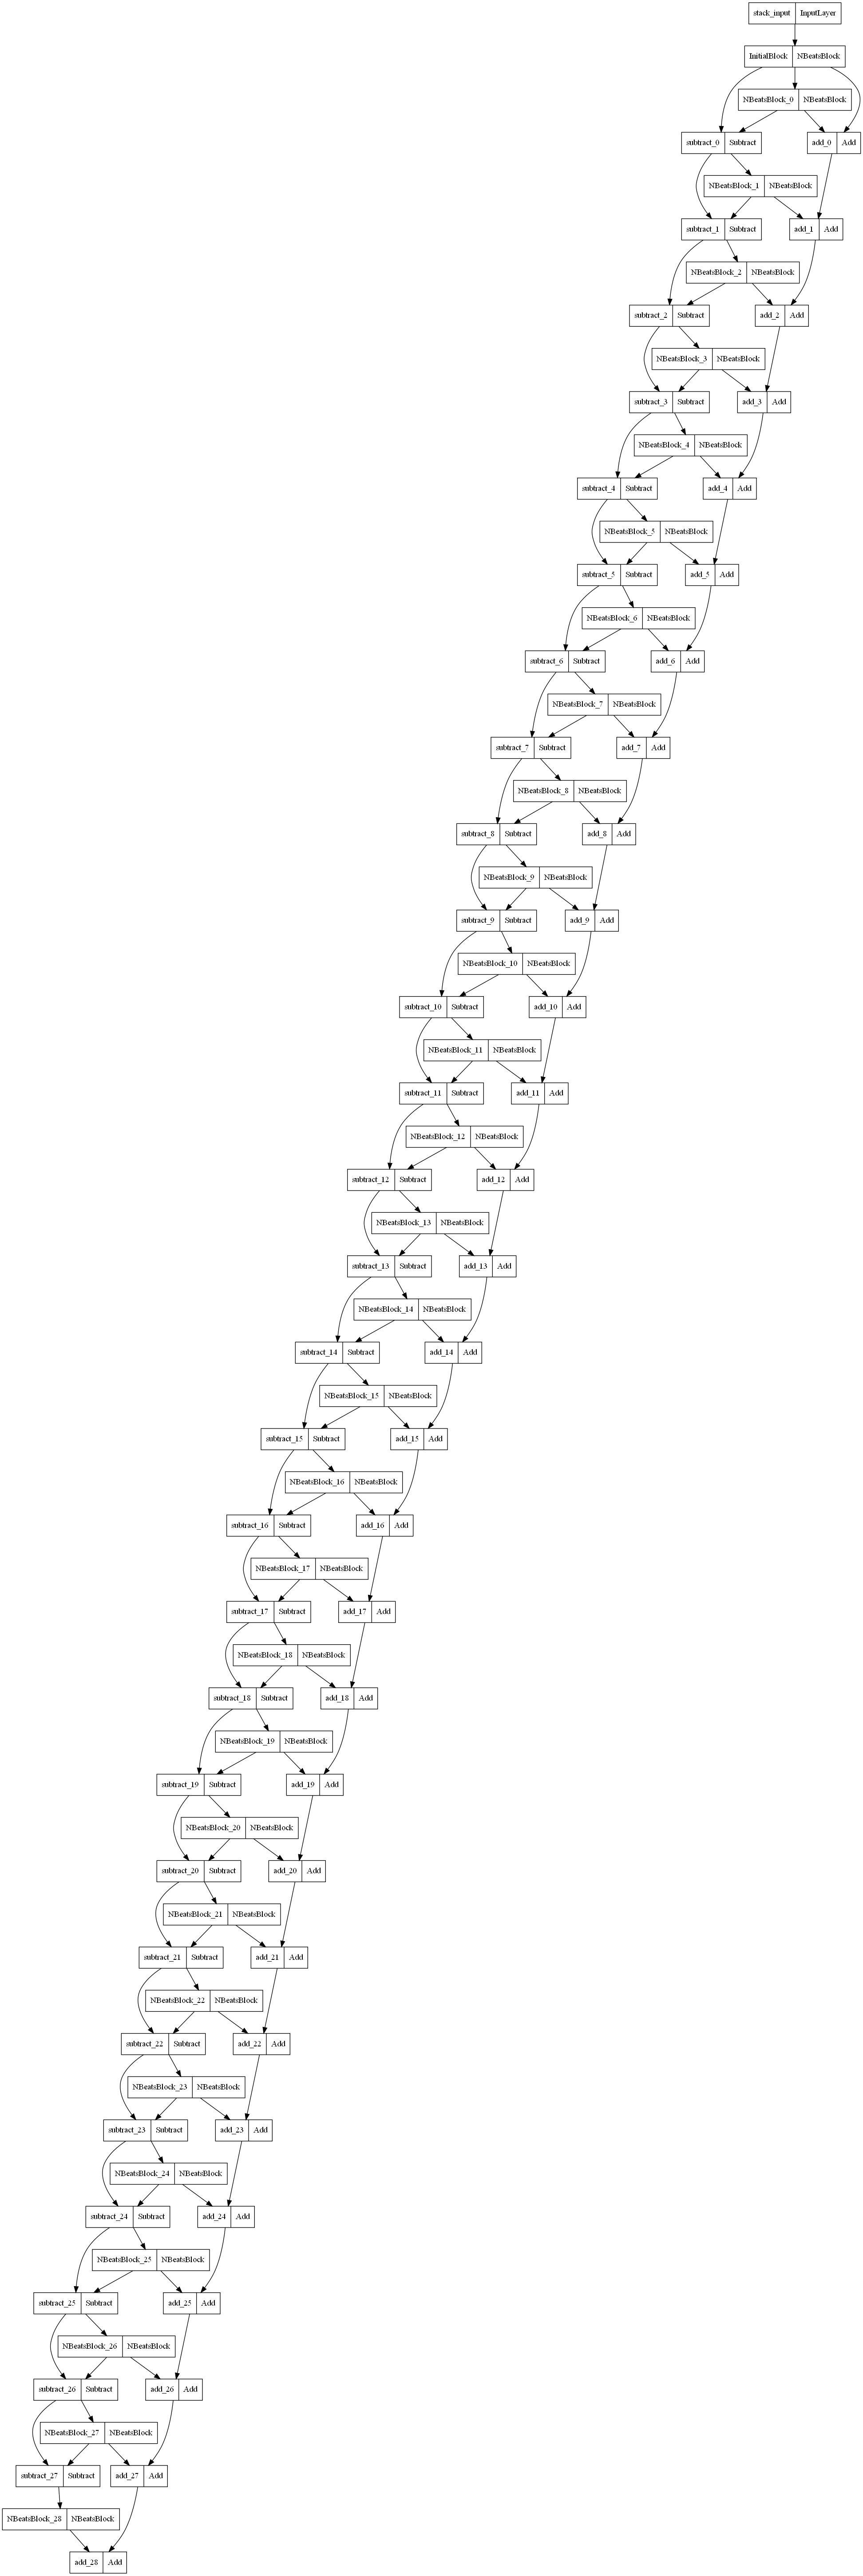

In [212]:
plot_model(model_7)

#### Model_8: Creating an Ensemble(stacking differnt models together)


An ensemble leverages the wisdom of the crowd effect.

It combines many different models to predict a common goal.

In [214]:
HORIZON,WINDOW_SIZE

(1, 7)

#### Constructing and fitting  ensemble of models (using different loss functions

In [218]:
def get_ensemble_models(horizon=HORIZON,
                       train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
                        
                        
    """
    Returns a list of num_iter models each trained on MAE,MSE and MAPE loss.
    
    for example, if num_iter=10, a list of 30 trained models will be returned:
    10*len(["mae","mse","mape"]).
    
    """
    
    # Make empty list for trained ensemble models
    ensemble_models=[]
    
    #Create num_iter number of models per loss function
    for i in range(num_iter):
        # Build and fit a new model with a different loss fuction
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing:{loss_function} for {num_epochs} epochs,model number:{i}")
            
            # Construct a simple model (similar to model_1)
            
            model=tf.keras.Sequential([
                
                #Initialize dense layers with normal distribution for estimating prediction intervals later on
                layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
                layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
                layers.Dense(HORIZON)
                
            ])
            
            # compile a simple model with current loss function
            model.compile(loss=loss_function,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae","mse"])
            
            # Fit the current model
            model.fit(train_data,
                     epochs=num_epochs,
                     verbose=0,
                     validation_data=test_data,
                     callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                patience=200,
                                                                restore_best_weights=True),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                   petience=100,
                                                                   verbose=1)])
            
            #Append fitted model to list of ensemble models
            ensemble_models.append(model)
    return ensemble_models

In [219]:
%%time

#Get list of Trained ensemble models
ensemble_models=get_ensemble_models(num_iter=5,
                                   num_epochs=1000)

Optimizing model by reducing:mae for 1000 epochs,model number:0

Epoch 323: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 454: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 464: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 474: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 484: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 494: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 504: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.

Epoch 514: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.

Epoch 524: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.

Epoch 534: ReduceLROnPlateau reducing learning rate to 1.0000001044244145e-13.

Epoch 544: ReduceLROnPlateau reducing learning rate to 1.0000001179769417e-14.

Epoch 554: ReduceLROnPlateau reducing learning rate to 1.000


Epoch 278: ReduceLROnPlateau reducing learning rate to 1.0000000664932204e-18.

Epoch 288: ReduceLROnPlateau reducing learning rate to 1.000000045813705e-19.

Epoch 298: ReduceLROnPlateau reducing learning rate to 1.000000032889008e-20.

Epoch 308: ReduceLROnPlateau reducing learning rate to 1.0000000490448793e-21.

Epoch 318: ReduceLROnPlateau reducing learning rate to 1.0000000692397185e-22.

Epoch 328: ReduceLROnPlateau reducing learning rate to 1.0000000944832675e-23.

Epoch 338: ReduceLROnPlateau reducing learning rate to 1.0000000787060494e-24.

Epoch 348: ReduceLROnPlateau reducing learning rate to 1.0000001181490946e-25.
Optimizing model by reducing:mape for 1000 epochs,model number:1

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 310: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 330: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 340: ReduceLROnPlateau reducing learning rate to 1.


Epoch 293: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 303: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.

Epoch 313: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.

Epoch 323: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.

Epoch 333: ReduceLROnPlateau reducing learning rate to 1.0000001044244145e-13.

Epoch 343: ReduceLROnPlateau reducing learning rate to 1.0000001179769417e-14.

Epoch 353: ReduceLROnPlateau reducing learning rate to 1.0000001518582595e-15.

Epoch 363: ReduceLROnPlateau reducing learning rate to 1.0000001095066122e-16.

Epoch 373: ReduceLROnPlateau reducing learning rate to 1.0000000830368326e-17.

Epoch 383: ReduceLROnPlateau reducing learning rate to 1.0000000664932204e-18.

Epoch 393: ReduceLROnPlateau reducing learning rate to 1.000000045813705e-19.

Epoch 403: ReduceLROnPlateau reducing learning rate to 1.000000032889008e-20.

Epoch 413: ReduceLROnPlateau reducing learnin


Epoch 37: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 48: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 75: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 85: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 95: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 105: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 115: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.

Epoch 125: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.

Epoch 135: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.

Epoch 145: ReduceLROnPlateau reducing learning rate to 1.0000001044244145e-13.

Epoch 155: ReduceLROnPlateau reducing learning rate to 1.0000001179769417e-14.

Epoch 165: ReduceLROnPlateau reducing learning rate to 1.0000001518582595e-15.

Epoch 175: ReduceLROnPlateau reducing learning ra

#### Make predictions with our ensemble model

In [220]:
ensemble_models

In [221]:
# create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models,data):
    ensemble_preds=[]
    for model in ensemble_models:
        preds=model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [225]:
# create a list of ensemble predictions

#%%time

ensemble_preds=make_ensemble_preds(ensemble_models=ensemble_models,
                                  data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 38ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8810.698,  8776.961,  9091.484, ..., 49647.25 , 47985.277,
        44947.676],
       [ 8879.628,  8794.064,  8987.131, ..., 49811.652, 48117.86 ,
        46080.21 ],
       [ 8794.834,  8764.433,  9018.7  , ..., 50241.84 , 48594.367,
        46503.727],
       ...,
       [ 8830.42 ,  8769.963,  8986.253, ..., 49771.793, 48013.055,
        46377.168],
       [ 8743.147,  8830.36 ,  9020.476, ..., 50329.723, 47517.11 ,
        46731.42 ],
       [ 8876.218,  8787.075,  9074.819, ..., 49691.984, 48919.633,
        45460.52 ]], dtype=float32)>

In [226]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8810.698,  8776.961,  9091.484, ..., 49647.25 , 47985.277,
        44947.676],
       [ 8879.628,  8794.064,  8987.131, ..., 49811.652, 48117.86 ,
        46080.21 ],
       [ 8794.834,  8764.433,  9018.7  , ..., 50241.84 , 48594.367,
        46503.727],
       ...,
       [ 8830.42 ,  8769.963,  8986.253, ..., 49771.793, 48013.055,
        46377.168],
       [ 8743.147,  8830.36 ,  9020.476, ..., 50329.723, 47517.11 ,
        46731.42 ],
       [ 8876.218,  8787.075,  9074.819, ..., 49691.984, 48919.633,
        45460.52 ]], dtype=float32)>

In [233]:
ensemble_mean=tf.reduce_mean(ensemble_preds,axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8806.534 , 8757.076 , 9020.94  , 8725.3545, 8753.071 , 8722.326 ,
       8632.245 , 8493.959 , 8446.441 , 8501.434 ], dtype=float32)>

In [232]:
ensemble_median=np.median(ensemble_preds,axis=0)
ensemble_median[:10]

array([8814.736, 8769.963, 9020.476, 8733.756, 8744.384, 8735.123,
       8626.46 , 8486.523, 8447.994, 8502.069], dtype=float32)

In [237]:
# Evaluate ensemble model predictions
ensemble_results_mean=evaluate_preds(y_true=y_test,
                               y_pred=ensemble_mean)
ensemble_results_mean

{'mae': 564.7444,
 'mse': 1133040.1,
 'rmse': 1064.4436,
 'mape': 2.554574,
 'mase': 0.99209946}

In [238]:
# Evaluate ensemble model predictions
ensemble_results_median=evaluate_preds(y_true=y_test,
                               y_pred=ensemble_median)
ensemble_results_median

{'mae': 565.61554,
 'mse': 1135407.2,
 'rmse': 1065.5549,
 'mape': 2.5626135,
 'mase': 0.9936298}

In [227]:
# Evaluate ensemble model predictions
ensemble_results=evaluate_preds(y_true=y_test,
                               y_pred=ensemble_preds)

In [228]:
ensemble_results

{'mae': 589.95605,
 'mse': 1202345.2,
 'rmse': 1096.3843,
 'mape': 2.6884024,
 'mase': 1.0363895}

In [229]:
model_1_results

{'mae': 565.2325,
 'mse': 1153096.9,
 'rmse': 1073.8235,
 'mape': 2.5350597,
 'mase': 0.99295694}

our ensemble preds come out in multiple dimensions but to combine into **point prediction** we can leverage the mean of all of the predictions or the median

Combining ensemble predictions on :https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

Tradeoff will be it took longer times and longer time for predictions

#### Discussing the importance of prediction intervals in forecasting

#### Plotting the Prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models

E.g. Horizon=1,our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?


To get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models (we've got this tanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds,add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)


https://www.uber.com/en-IN/blog/neural-networks-uncertainty-estimation/

#### Getting the upper and lower bounds of our prediction intervals

In [240]:
# Find upper and Lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized models
    
    
    # 2. Measure the standard deviation of the predictions
    std=tf.math.reduce_std(preds,axis=0)
    
    # 3. Multiply the standard deviation by 1.96
    interval=1.96*std
    
    # 4. Get the predictions interval upper and lower bounds
    preds_mean=tf.reduce_mean(preds,axis=0)
    lower,upper=preds_mean-interval,preds_mean+interval
    
    return lower,upper

In [241]:
#Get the upper and lower bounds of the 95% percent prediction interval
lower,upper=get_upper_lower(preds=ensemble_preds)
lower,upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8691.654 ,  8657.445 ,  8925.014 ,  8597.413 ,  8679.256 ,
         8620.711 ,  8532.728 ,  8367.924 ,  8341.075 ,  8469.701 ,
         8112.131 ,  8032.5093,  7956.4307,  7520.3936,  7219.0093,
         7151.3   ,  6932.3677,  7090.3267,  7029.4487,  7382.505 ,
         7293.6064,  7644.375 ,  7481.6006,  7277.351 ,  7225.5137,
         7155.045 ,  7103.609 ,  7328.3833,  7435.9404,  7491.922 ,
         7497.2617,  7260.535 ,  7149.176 ,  7113.589 ,  7110.6294,
         7177.119 ,  7021.475 ,  7057.76  ,  6813.12  ,  6506.924 ,
         7140.2   ,  6972.0938,  7027.49  ,  7144.4297,  6999.4116,
         7002.2124,  7162.3154,  7149.541 ,  7130.547 ,  7182.8174,
         7259.6875,  7338.5596,  7199.479 ,  7119.877 ,  7109.578 ,
         6874.3926,  7174.046 ,  7236.192 ,  7309.449 ,  7590.798 ,
         7913.4927,  8030.4893,  7752.598 ,  7974.127 ,  7989.9873,
         8085.554 ,  8024.414 ,  8545.045 ,  8748.015 ,  8680.428 ,

Many of the steps we've taken above have inspired/referenced from Machine Learning Mastery blog post on
https://machinelearningmastery.com/prediction-intervals-for-machine-learning/

#### Plotting the prediction intervals of our ensemble model predictions


The sample median is more robust than the mean because it is more resilient to this kind of change.
https://www.johndcook.com/blog/2009/03/06/student-t-distribution-mean-median/#:~:text=For%20values%20of%20%CE%BD%20less%20than%20that%20cutoff%2C,%3D%200.63662%2C%20indicated%20by%20the%20bottom%20horizontal%20line.

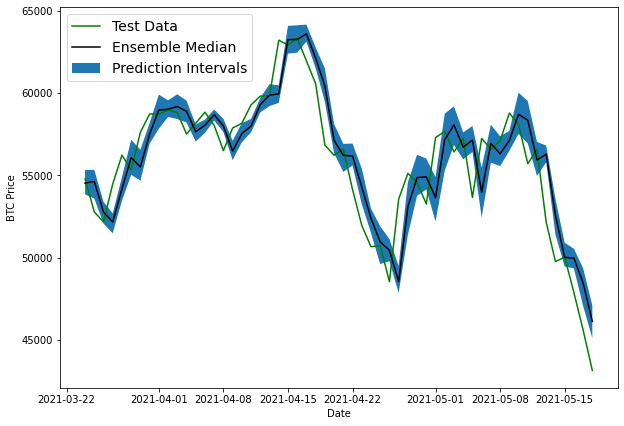

In [244]:
# Get the median/mean values of our ensemble preds
ensemble_median=np.median(ensemble_preds,axis=0)

#Plot the median of our ensemble preds along with the prediction intervals(where the predictions fall between)
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"g",label="Test Data")
plt.plot(X_test.index[offset:],ensemble_median[offset:],"k-",label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between
plt.fill_between(X_test.index[offset:],
                (lower)[offset:],
                (upper)[offset:],label="Prediction Intervals")
plt.legend(loc="upper left",fontsize=14);

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.


**Note:** These prediction intervals are estimates themselves. And they have been created with the assumptions that our model's data is from a Normal distribution

#### Discussing the types of uncertainity in Machine Learning

Aside: two types of uncertainity (coconut and subway)

Uncertainty estimates in machine learning seek out to quantitatively and quantitatively answer the questions:
1. What can my model Know? (with perfect data, what's possible for a model to learn?
2. What does'nt my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?

There are two major types of uncertainty in machine Learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
    - Cannot be reduced with more data

Quite hard to differentiate the two

* **Epistemic Uncertainty** - this type of  uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty
    - Can be reduced with more data

#### Model 9:Preparing data to create a model capable of predicting into the future

Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset,
however, this is only a Pseudofuture.

Let's now build a model which is capable of predicting into future!

In [246]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [247]:
# Train model on entire data to make predictions for the next day
X_all=bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()

#Get labels
y_all=bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all),len(y_all)

(2780, 2780)

In [248]:
X_all[:5],y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [249]:
#Turn data into efficient running tensors

features_dataset_all=tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all=tf.data.Dataset.from_tensor_slices(y_all)


# Combine features and labels
dataset_all=tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))


#Batch and prefetch for optimal performance
BATCH_SIZE=1024
dataset_all=dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

#### Model 9:Building,compiling and fitting a future predictions model

In [251]:
tf.random.set_seed(42)

# 1. Create the model
model_9=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_9_future")


# 2. Compile the model
model_9.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
           epochs=100,
           verbose=0)

In [252]:
# How many timesteps to predict into the future?
INTO_FUTURE=14

To Make predictions into the future we want a function which:

1. Takes as input:
    * a list of values (Bitcoin historical data)
    * a trained model (such as `model_9`)
    * a window into the future to predict (our `INTO_FUTURE` variable)
    * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on (which means same shape ,same dtype)
    
2. Create an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values

3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction
    


#### Model_9: Creating a function to make forecasts into the future

In [255]:
def make_future_forecasts(values,model,into_future,window_size=WINDOW_SIZE)-> list:
    """
    
    Make future forecasts into_future steps after values ends.
    
    Returns future forecasts as a list of floats.
    """
    # 2. Create an empty list for future forecasts/prepare data to forecast on
    future_forecast=[]
    last_window=values[-WINDOW_SIZE:]
    
    # 3. Make INTO_FUTURE number of predictions,altering the data which gets predicted on each
    for _ in range(INTO_FUTURE):
        #predict on the last window then append it again,again,again (our model will eventially start to make forecasts on it's own forecasts)
        future_pred=model.predict(tf.expand_dims(last_window,axis=0))
        print(f"Predicting on:\n{last_window}->Prediction:{tf.squeeze(future_pred).numpy()}\n")
        
        #Append predictions to future_forecast
        future_forecast.append(tf.squeeze(future_pred).numpy())
        
        #update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window=np.append(last_window,future_pred)[-WINDOW_SIZE:]
    return future_forecast
        
        

In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction

so perhaps you could try to : make a prediction (one Timestep into the future), retrain a model with this new prediction appended to the data, make a prediction,append the prediction,retrain a model..etc


As it is, the make_future_forecasts() function skips the retraining of model part

In [256]:
#Make forecasts into the future
future_forecast= make_future_forecasts(values=y_all,
                                      model=model_9,
                                      into_future=INTO_FUTURE,
                                      window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 16ms/step
Predicting on:
[56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086]->Prediction:55434.84765625

1/1 [==============================] - 0s 15ms/step
Predicting on:
[52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55434.84765625]->Prediction:52143.70703125

1/1 [==============================] - 0s 15ms/step
Predicting on:
[49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55434.84765625 52143.70703125]->Prediction:48249.40234375

1/1 [==============================] - 0s 15ms/step
Predicting on:
[50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55434.84765625 52143.70703125 48249.40234375]->Prediction:48736.15234375

1/1 [==============================] - 0s 14ms/step
Predicting on:
[47885.62525472 45604.61575361 43144.47129086 55434.84765625
 52143.70703125 48249.40234375 48736.15234375]->Prediction:4

In [257]:
future_forecast

[55434.848,
 52143.707,
 48249.402,
 48736.152,
 47250.668,
 46478.56,
 48927.348,
 54216.71,
 50468.996,
 47464.8,
 48358.51,
 47932.004,
 48623.332,
 51274.824]

#### Model_9: Plotting our model's Future Forecasts

In [263]:
def get_future_dates(start_date,into_future,offset=1):
    """
    Returns array of datetime values ranging form start_date to start_date+into_future
    """
    start_date=start_date+np.timedelta64(offset,"D") #specify start date,"D" stands for day
    end_date=start_date+np.timedelta64(into_future,"D")  #Specify end date
    return np.arange(start_date,end_date,dtype="datetime64[D]") #return a date range between start and end date

In [264]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep=bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [265]:
# get nect two week of timesteps
next_time_steps=get_future_dates(start_date=last_timestep,
                                into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [268]:
#Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps=np.insert(next_time_steps,0,last_timestep)
future_forecast=np.insert(future_forecast,0,btc_price[-1])
next_time_steps,future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55434.848, 52143.707, 48249.402, 48736.152, 47250.668,
        46478.56 , 48927.348, 54216.71 , 50468.996, 47464.8  , 48358.51 ,
        47932.004, 48623.332, 51274.824], dtype=float32))

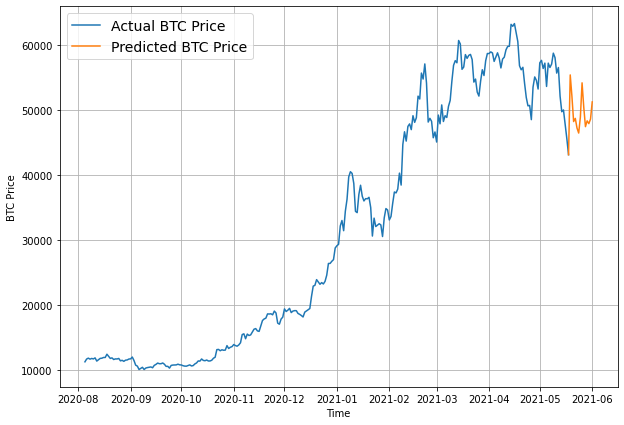

In [269]:
#Plot future prices predictions of Bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price,start=2500,format="-",label="Actual BTC Price")
plot_time_series(next_time_steps,future_forecast,format="-",label="Predicted BTC Price")

#### Model 10:Introducing the Turkey problem and making data for it

#### Why forecasting is BS(the turkey problem)

In [270]:
# let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)

btc_price_turkey=btc_price.copy()
# btc_price_turkey[-1]=btc_price_turkey

In [271]:
len(btc_price_turkey)

2787

In [273]:
#Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey=btc_price.copy()
btc_price_turkey[-1]=btc_price_turkey[-1]/100

In [274]:
#Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [275]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [276]:
#get th timesteps for the turkey problem
btc_timesteps_turkey=np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

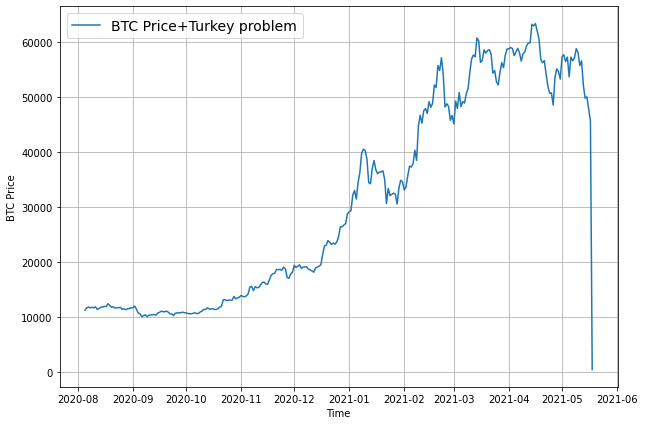

In [277]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                values=btc_price_turkey,
                format="-",
                label="BTC Price+Turkey problem",
                start=2500)

In [278]:
#create train and test sets for turkey problem data
full_windows,full_labels=make_windows(np.array(btc_price_turkey),window_size=WINDOW_SIZE,horizon=HORIZON)
x_train,x_test,y_train,y_test=make_train_test_splits(full_windows,full_labels)
len(x_train),len(y_train),len(x_test),len(y_test)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2224, 2224, 556, 556)

In [279]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


#### Model_10:Building a model to predict on turkey data (why forecasting is BS)

In [281]:
tf.random.set_seed(42)

# Create the model
model_10=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_10_turkey")

# Compile the model
model_10.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


# Fit the model
model_10.fit(x=x_train)

In [283]:
# Clone model_1 architecture for turkey model and fit the turkey model on the Turkey data
turkey_model=tf.keras.models.clone_model(model_1)
turkey_model._name="model_10_Turkey_Model"
turkey_model.compile(loss="mae",
                    optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(x_train,y_train,
                epochs=100,
                verbose=0,
                batch_size=128,
                validation_data=(x_test,y_test),
                callbacks=[create_model_checkpoint(model_name=turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_Turkey_Model\assets


In [285]:
# Evaluate  model on test data
turkey_model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 713.3958


713.395751953125

In [286]:
# Load best performing turkey model and evaluate on test data
turkey_model=tf.keras.models.load_model("model_experiments/model_10_Turkey_Model")
turkey_model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 644.2539


644.25390625

In [287]:
# Make predictions with turkey model
turkey_preds=make_preds(turkey_model,x_test)
turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8843.371, 8762.818, 9022.296, 8772.972, 8716.926, 8731.693,
       8686.347, 8496.464, 8457.192, 8517.321], dtype=float32)>

In [288]:
# Evaluate turkey preds
turkey_results=evaluate_preds(y_true=y_test,
                             y_pred=turkey_preds)
turkey_results

{'mae': 17138.244,
 'mse': 615107200.0,
 'rmse': 23732.443,
 'mape': 121.48103,
 'mase': 26.521488}

In [289]:
model_1_results

{'mae': 565.2325,
 'mse': 1153096.9,
 'rmse': 1073.8235,
 'mape': 2.5350597,
 'mase': 0.99295694}

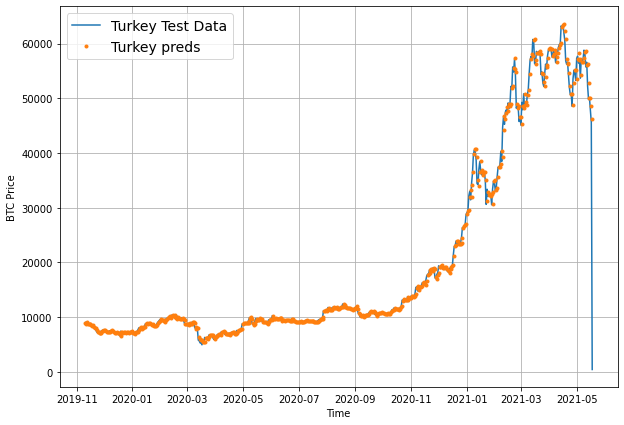

In [291]:
plt.figure(figsize=(10,7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(x_test):],
                values=btc_price_turkey[-len(y_test):],
                format="-",
                label="Turkey Test Data",start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(x_test):],
                values=turkey_preds,
                label="Turkey preds",
                start=offset)

#### Comparing the results of all of our models

In [298]:
# compare different model results (w=window,h=horizon,e.g. w=7 means a window size of 7)
model_results=pd.DataFrame({"naive_model":naive_results,
                           "model_1_dense_w7_h1": model_1_results,
                           "model_2_dense_w30_h1": model_2_results,
                           "model_3_dense_w30_h7": model_3_results,
                           "model_4_CONV1D":model_4_results,
                           "model_5_LSTM":model_5_results,
                           "model_6_multivariate": model_6_results,
                           "model_7_NBEATS":model_7_results,
                           "model_8_ensemble":ensemble_results,
                           "model_10_turkey":turkey_results}).T

In [299]:
model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,565.232483,1.153097e+06,1073.823486,2.535060,0.992957
model_2_dense_w30_h1,613.507996,1.285714e+06,1133.893311,2.760514,1.072418
model_3_dense_w30_h7,1205.156372,5.125522e+06,1389.155518,5.431765,2.144509
model_4_CONV1D,566.381165,1.163260e+06,1078.545044,2.529856,0.994975
model_5_LSTM,587.568359,1.234037e+06,1110.872192,2.635329,1.032195
model_6_multivariate,562.498718,1.150431e+06,1072.581299,2.500739,0.988154
model_7_NBEATS,570.751038,1.154246e+06,1074.358154,2.610198,1.002651
model_8_ensemble,564.744385,1.133040e+06,1064.443604,2.554574,0.992099
model_10_turkey,17138.244141,6.151072e+08,23732.443359,121.481033,26.521488


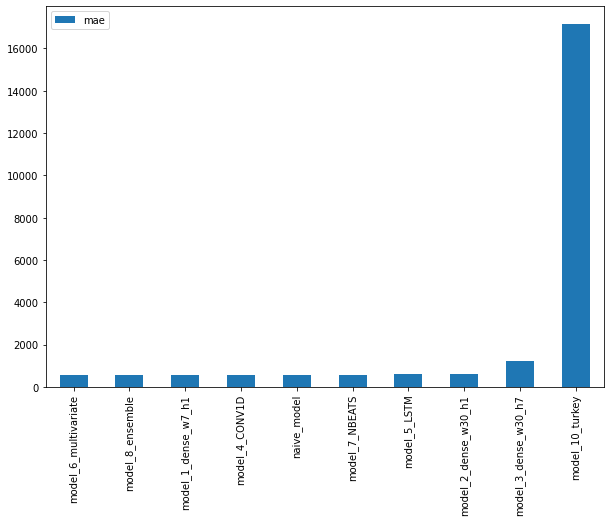

In [300]:
# sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7),kind='bar');